<a href="https://colab.research.google.com/github/wish1421/BAIN/blob/main/Week_1_Thinking_Probabilistically_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week  1 : Thinking Probabilistically
In first week, we wil learn about the core concepts of Bayesian statistics and some of the instruments in the Bayesian toolbox. We will use some Python code, but this week's content wil be mostly theoretical; most of the concepts we will see here will be revisited many times throughout this book. This notebook will ease the path to effectively applying Bayesian statistics to your problems.

## 1.1 Statistics, models, and the probabilistic approach
Alright, so in statistics, we're basically dealing with collecting, organizing, and understanding data. There are two big methods we use for this: Exploratory Data Analysis (EDA) and Inferential Statistics (the last part in MSO201A).

 * EDA is all about numerical summaries, such as the mean, mode, and standard deviation. It is also about visually inspecting the data, using histograms and scatter plots.
 * Inferential Statistics is where we make educated guesses based on our data. Like, if we have a bunch of data on how people buy ice cream in summer, we might use that to guess how many ice creams we'll sell next summer.

This project focuses mainly on a cool method called **Bayesian inferential statistics**, but it also uses ideas from EDA to help us understand and explain our results better. This lets us be more creative with the tiny bit of statistics that we know.

There are two big reasons why we are able do this now: First, statistics is like a big puzzle, and using probability theory helps us see how all the pieces fit together. And second, we have really cool software like PyMC that makes it way easier for regular folks like us to do complex math stuff without tearing our hair out.

## 1.2 Working with Data
Data is like the main ingredient in statistics and data science. It comes from different places like experiments, surveys, or just observations. Before we even start gathering data, it's smart to think about what questions we're trying to answer and how we're going to do it. There's a whole branch of statistics just for figuring out the best ways to collect data.

When we're dealing with data, we have to remember that it's not always straightforward. There can be all sorts of uncertainties, like technical problems or just not knowing everything about the system we're studying. That's why we need to use models to help make sense of the data. Data doesn't just tell us what's going on by itself - we have to interpret it with the help of these models.

**"Data does not speak but through models."**

In this project, we're going to pretend like we already have all the data we need, and that it's all nice and clean. But in the real world, data is often messy. So, even though I won't cover it here, it's important to learn coding in Python. Being able to write code is super useful for dealing with messy data *(Check out last year's project that I mentored in stamatics - Forecasting using Time Series Analysis if you would like to learn more about data cleaning etc.)* and doing modern Bayesian statistics, which is all about making predictions based on probability.

If you're interested in learning Python for handling data, this video: https://youtu.be/r-uOLxNrNk8?si=e5utTG4CzG-N-b2M&t=10038 is a great place to start.

## 1.3 Bayesian modeling
Models are like simplified versions of real-life systems or processes that we're interested in. They're designed to capture the most important parts without getting bogged down in every little detail. That's why sometimes simpler models are actually better than really complicated ones.

In this book, we're focusing on a type of model called Bayesian models. Here's how they work. We can summarize the Bayesian modeling process using three steps:
1. Given some data and some assumptions on how this data could have been generated, we build a model using probability distributions, which are like building blocks for describing how likely different outcomes are. Most of the time these models are crude approximations, but that's all we need. We need an assumption of what we think is the probability distribution of the outcomes.  

2. Next, we use something called Bayes' theorem to update our model with the actual data we have. This helps us figure out what our data tells us about the system we're studying. We say we are conditioning the model on our data.

3. Finally, we check how well our model fits the data and make sure it makes sense based on what we already know. Sometimes, we might need to tweak our model or get more data to improve it.

We usually end up going through these steps a bunch of times, tweaking our model as we learn more or find mistakes. This is exactly what the later half of CS771A course teaches us.  

These Bayesian models are called probabilistic models because they're based on probabilities. Why probabilities? Well, they're really handy for dealing with uncertainty, which is a big part of modeling real-world stuff. Plus, there's some pretty solid math behind why probabilities are the right tool for the job.

# 1.4 Probability Basics (But Through Code!)
In this section, we are going to discuss a few general and important concepts that are key for better understanding Bayesian methods. Additional probability-related concepts wil be introduced or elaborated on in further weeks, as we need them.

Those already familiar with the basic elements of probability theory can skip this section, or just have a look at the code part.

## 1.4.1 Sample space and events
Let's say we are surveying to see how people feel about the weather in their area. We asked three individuals whether they enjoy sunny weather, with possible responses being “yes” or “no.”

The sample space of all possible outcomes can be denoted by S and consists of eight possible combinations:
```
S = {(yes, yes, yes), (yes, yes, no), (yes, no, yes), (no, yes, yes), (yes, no, no), (no, yes, no), (no, no, yes),(no, no, no)}
```
Here, each element of the sample space represents the responses of the three individuals in the order they were asked. For example, (yes, no, yes) means the first and third people answered “yes” while the second person answered “no.”

We can define events as subsets of the sample space. For example, event A is when all three individuals answered “yes”:
```
A = {(yes, yes, yes)}
```

Similarly, we can define event B as when at least one person answered “no,” and then we wil have:
```
B = {(yes, yes, no), (yes, no, yes), (no, yes, yes), (yes, no, no), (no, yes, no), (no, no, yes), (no, no, no)}
```
We can use probabilities as a measure of how likely these events are. Assuming all events are equally likely, the probability of event A, which is the event that all three individuals answered “yes,” is:
```
P(A) = number of outcomes in A / total number of outcomes in S
P(A) = 1/8 = 0.125
```
In this case, there is only one outcome in A, and there are eight outcomes in S.
Similarly, we can calculate the probability of event B, which is the event that at least one person answered “no.” Since there are seven outcomes in B and eight outcomes in S, the probability of B is:
```
P(B) = 7/8 = 0.875
```
**Q. What's the probability of entire sample space?**

**Q. If C = {(banana, banana, banana)} then what's P(C)?**

In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found existi

In [ ]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

We can take advantage of the fact that Python includes sets and define a Python function to compute probabilities following their naive definition:

In [ ]:
def P(S, A): # A = event , S = sample space
    if set(A).issubset(set(S)): # set A is an event
        return len(A)/len(S)
    else:
        return 0

In [ ]:
A = {(1,1,1)}
S = {(1,1,1),(1,1,0),(1,0,1),(1,0,0),(0,1,1),(0,1,0),(0,0,1),(0,0,0)}

print("P(A):" , P(S,A))
print("P(S):" , P(S,S))

P(A): 0.125
P(S): 1.0


**Q. Find P(C) using the above probability funtion.**

## 1.4.2 Random variables
 A random variable is a function that maps the sample space into the real numbers R. Let's assume the events of interest are the number of a die, the mapping is very simple, we associate number at top of die with the number 1,  with 2, etc. Another simple example is the answer to the question, wil it rain
 tomorrow? We can map “yes” to 1 and “no” to 0.
 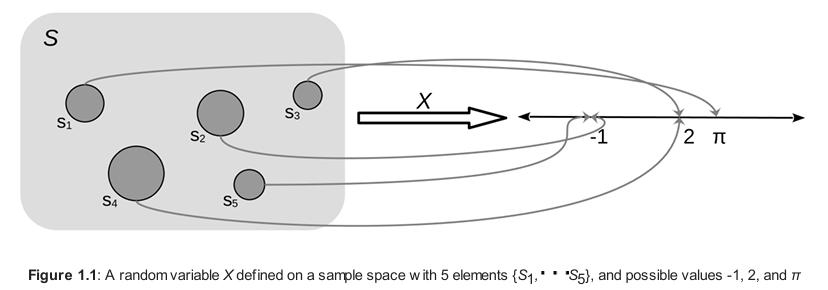
 It is common, but not always the case, to use a capital letter for random variables like $X$ and a lowercase letter for their outcomes $x$. For example, if $X$
 represents a single role of a die, then $x$ represents some specific integer {1,2,3,4,5,6}.

 Thus, we can write P($X$ = 3) to indicate the probability of getting the value 3, when roling a die. We can also leave $x$ unspecified, for instance, we can write P($X$ = $x$) to indicate the probability of getting some value x, or
 P($X$ ≤ $x$), to indicate the probability of getting a value less than or equal to $x$.

**More about Random Variables:**
* Being able to map "top of a die"  or strings like “yes” to numbers makes analysis simpler as we already know how to do math with numbers. Random variables are also useful because we can operate with them without directly thinking in terms of the sample space. This feature of random variable becomes more and more relevant as the sample space becomes more complex.
* The mapping between the sample space and $R$ is deterministic. There is no randomness involved. So, why do we call it a **random variable**? Because we can ask the variable for values, and every time we ask, we will get a different number. The randomness comes from the probability associated with the events. In above figure, we have represented P as the size of the circles.

* The two most common types of random variables are discrete and continuous ones. Without going into a proper definition, we are going to say that discrete variables take only discrete values and we usually use integers to represent them, like 1, 5, 42. And continuous variables take real values, so we use floats
to work with them, like 3.1415, 1.01, 23.4214, and so on.

* When we use one or the other is problem dependent. If we ask people about their favorite color, we wil get answers like “red,” “blue,” and “green.” This is an example of a discrete random variable. The answers are categories - there are no intermediate values between “red” and “green.”

* But if we are studying the properties of light
 absorption, then discrete values like “red” and “green” may not be adequate and instead working with wavelength could be more appropriate. In that case, we will expect to get values like 650 nm and 510nm and any number in between, including 579.1.


## 1.4.3 Discrete random variables and their distributions
Instead of calculating the probability that all three individuals answered “yes,” or the probability of
 getting a 3 when roling a die, we may be more interested in finding out the list of probabilities for all
 possible answers or all possible numbers from a die. Once this list is computed, we can inspect it
 visually or use it to compute other quantities like the probability of getting at least one “no,” the
 probability of getting an odd number, or the probability of getting a number equal to or larger than 5. The
 formal name of this list is probability distribution.

 To find this distribution for something like a die, we can roll it several times and keep track of how many times each number comes up. Then, to make it into a proper distribution, we divide each count by the total number of rolls.

We can do this manually, but it's much easier and faster to use computers for things like rolling dice. This lets us not only save time but also handle really complicated distributions effortlessly. But for now, we'll focus on theoretical distributions, which are important in statistics because they help us build models based on probabilities.

In [ ]:
az.style.use("arviz-grayscale")
np.random.seed(314)
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

Head first, let's tackle a tough discrete random variable which follows the BetaBinomial probability distribution. Probability distributions have mathematical expressions that define them, and these expressions have parameters that we can change to define all members of a family of probability distributions.

Here, we are taking 4 possible values of the parameters to represent four members of the family of BetaBinomial probability distribution.

(α, β) $\in$ {(1, 1), (5, 2), (0.5, 0.5), (20, 20)}

The height of the bars represents the probability of each x value. The values of x below 1 or above 6 have a probability of 0 as they are out of the support of the distribution.

Text(-0.04, 0.4, 'P(X=x)')

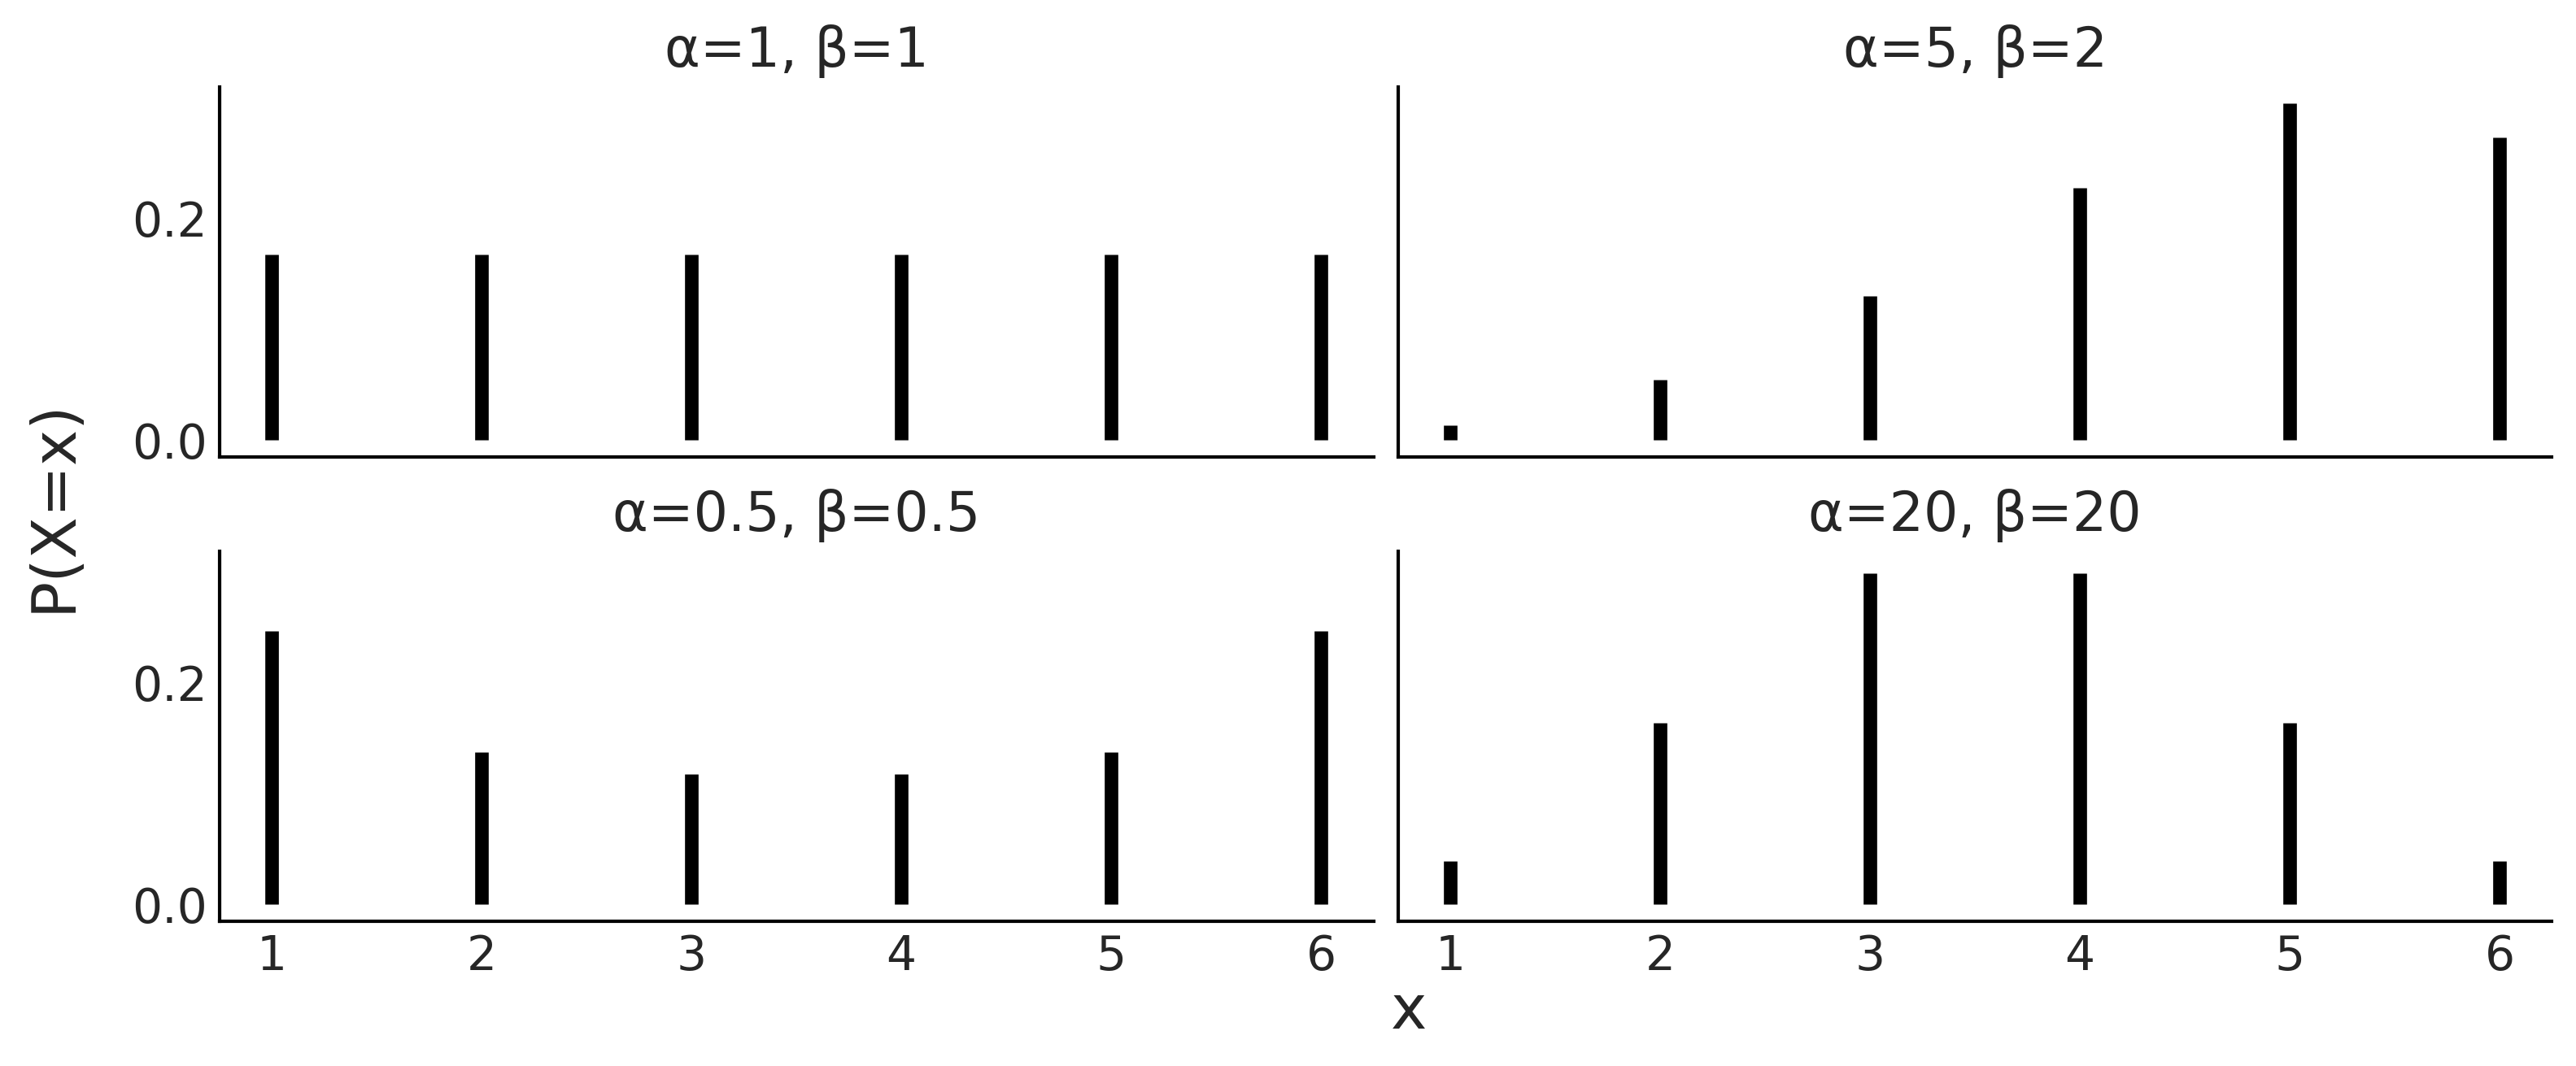

In [ ]:
n = 5
x = np.arange(0, 6)

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharey=True, sharex=True)
axes = np.ravel(axes)

for ax, (α, β) in zip(axes, ((1, 1), (5, 2), (0.5, 0.5), (20, 20))):
    dist_pmf = binom(n, x) * (beta(x+α, n-x+β) / beta(α, β)) # Defining the pmf of BetaBinomial
    ax.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    ax.set_title(f"α={α}, β={β}")
    ax.set_xticks(x)
    ax.set_xticklabels(x+1)
fig.text(0.52, -0.04, "x", fontsize=18)
fig.text(-0.04, 0.4, "P(X=x)", fontsize=18, rotation="vertical")
# plt.savefig("../fig/dice_distribution.png", bbox_inches='tight')

This is the mathematical expression for the BetaBinomial distribution:
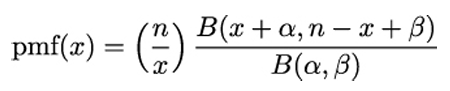

$pmf$ stands for probability mass function. For discrete random variables, the $pmf$ is the function that returns probabilities. In mathematical notation, if we have a random variable X, then $pmf(x) = P(X = x)$.

Understanding or remembering the pmf of the BetaBinomial has zero importance for us. I'm just showing it here so you can see that this is just another function; you put in one number and you get out
 another number.

Below are examples of how you can plot other standard discrete distributions:
1. Poisson Distribution

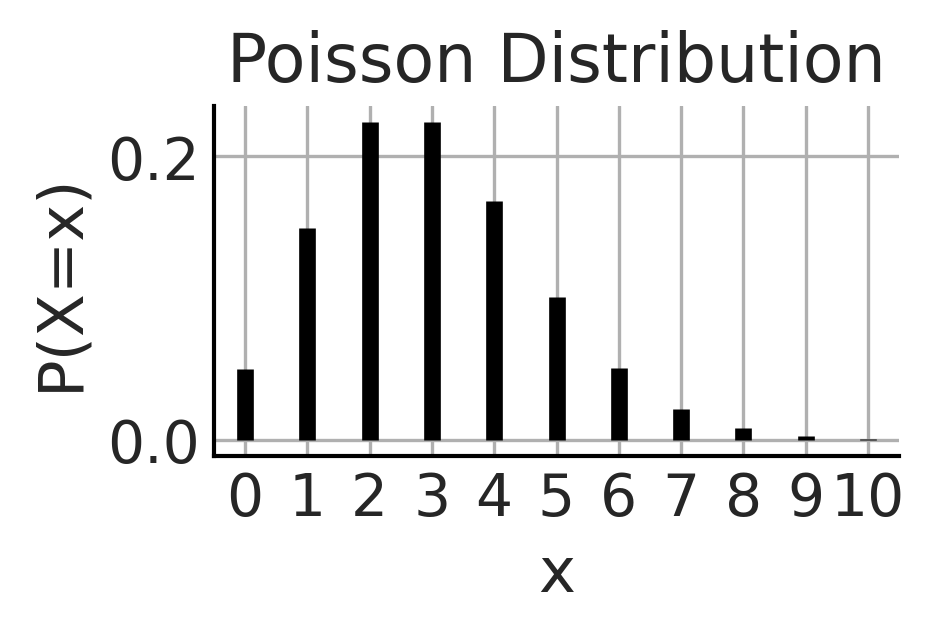

In [ ]:
np.random.seed(314)

# Parameters for the Poisson distribution
lambda_ = 3  # average rate of events

# Generate x values
x = np.arange(0, 11)

# Calculate the probability mass function (PMF) of the Poisson distribution
dist_pmf = np.exp(-lambda_) * np.power(lambda_, x) / [math.factorial(i) for i in x]

# Plot the distribution
plt.figure(figsize=(3, 2))
plt.vlines(x, 0, dist_pmf, colors='C0', lw=4)
plt.title("Poisson Distribution")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.xticks(x)
plt.grid(True)
plt.show()

2. Binomial Distribution:

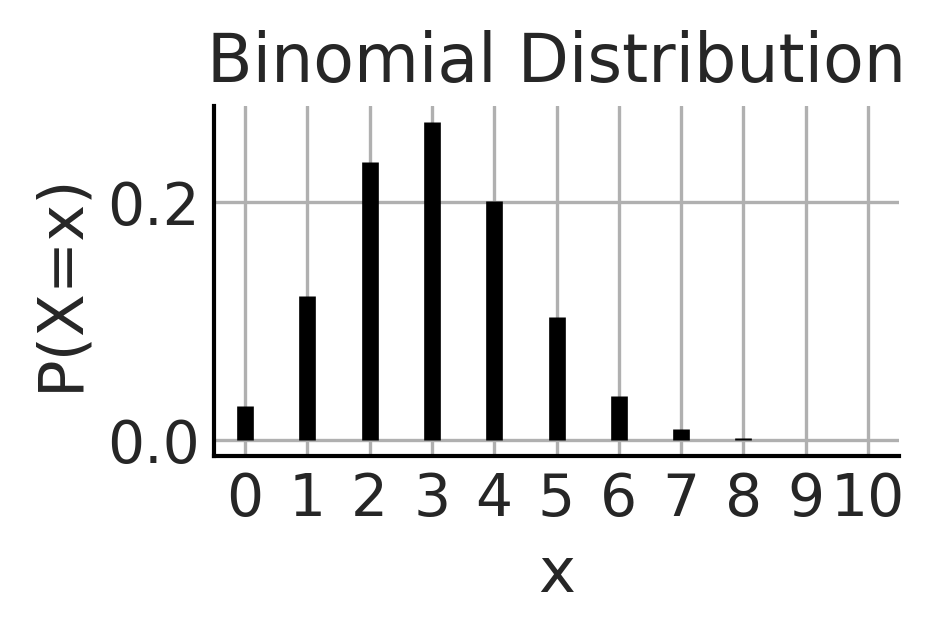

In [ ]:
np.random.seed(314)

# Parameters for the Binomial distribution
n = 10  # number of trials
p = 0.3  # probability of success

# Generate x values
x = np.arange(0, n+1)

# Calculate the probability mass function (PMF) of the Binomial distribution
dist_pmf = [math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in x]

# Plot the distribution
plt.figure(figsize=(3, 2))
plt.vlines(x, 0, dist_pmf, colors='C0', lw=4)
plt.title("Binomial Distribution")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.xticks(x)
plt.grid(True)
plt.show()

You can visit the documentation of [Preliz Distributions](https://preliz.readthedocs.io/en/latest/examples/param_space_1d_examples.html#distributions) to see how you can plot the above distributions in one line, and infact you can see how to make interactive plots  that will update every time you move the sliders for the parameters alpha, beta, and n:

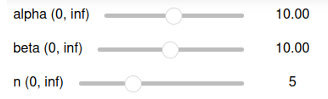

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

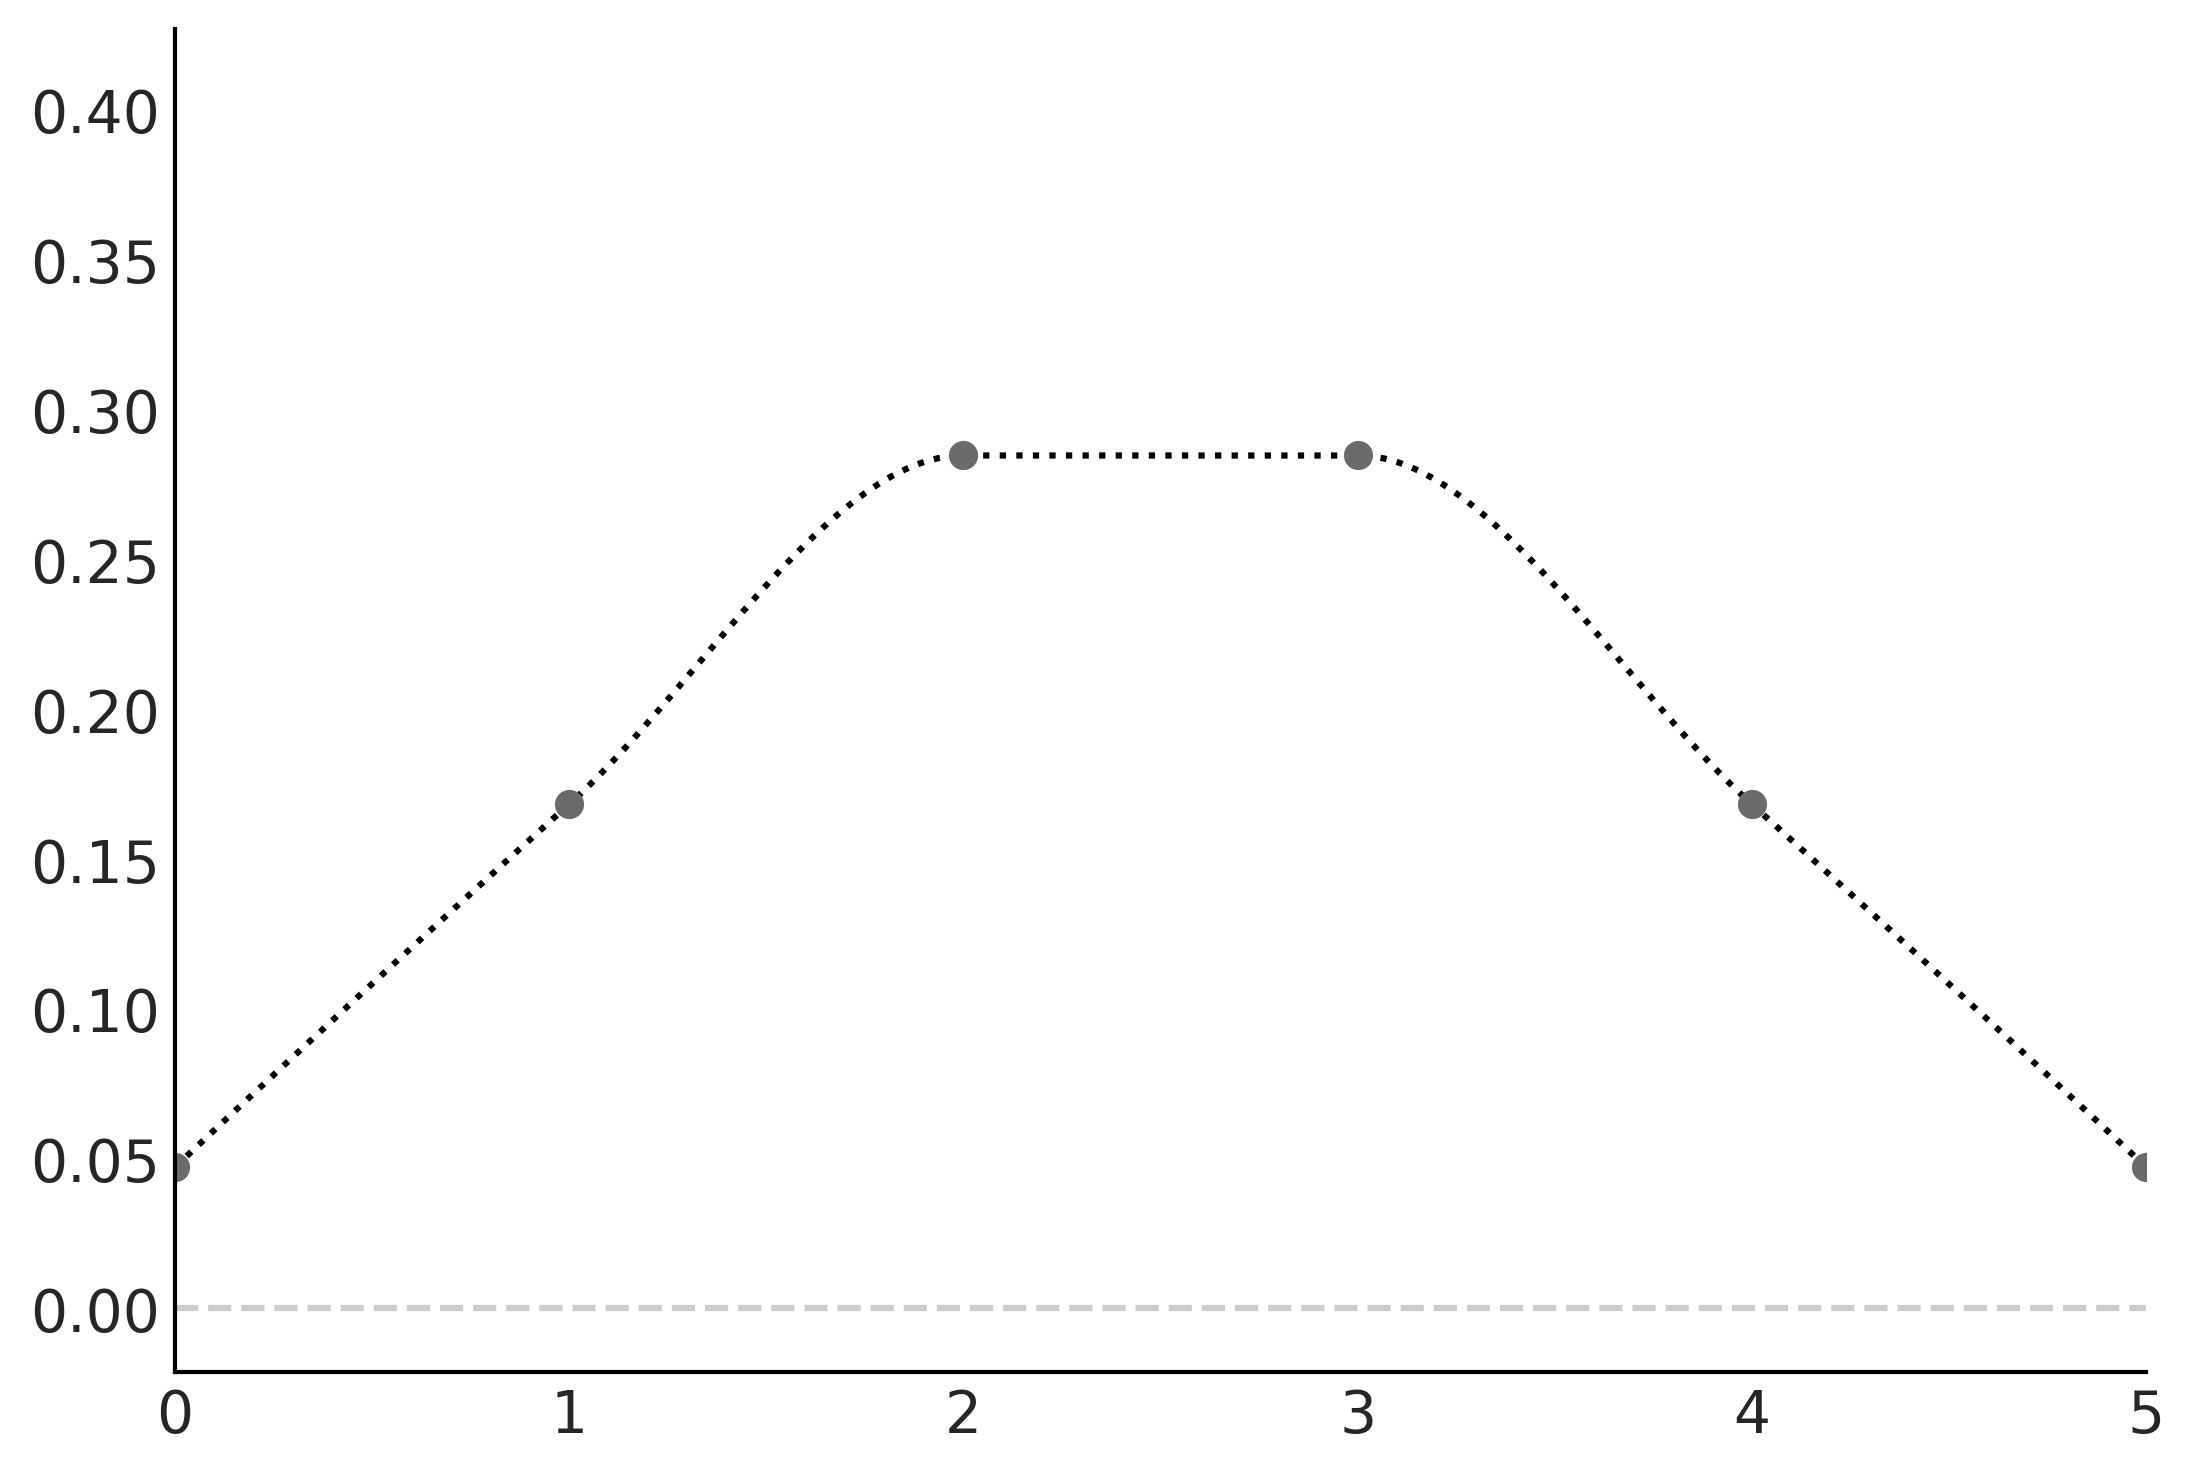

In [ ]:
# Run this cell, wait for some time, and sliders would show up.
# Move those sliders to see the plot update.
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive(pointinterval=False)

# Clear output after you've explored with various parameter values

 On the x-axis, we have the support of the BetaBinomial distribution, i.e., the values it can take, x ∈{0,1,2,3,4,5}. On the y-axis, the probabilities associated with each of those values.

 | x value | probability |
 |---------|-------------|
 0 | 0.047
 1 |  0.168
 2 | 0.285
 3 |  0.285
 4 |  0.168
 5 |  0.047

 Here's how you can plot pmf of poisson's distribution in one line of code:

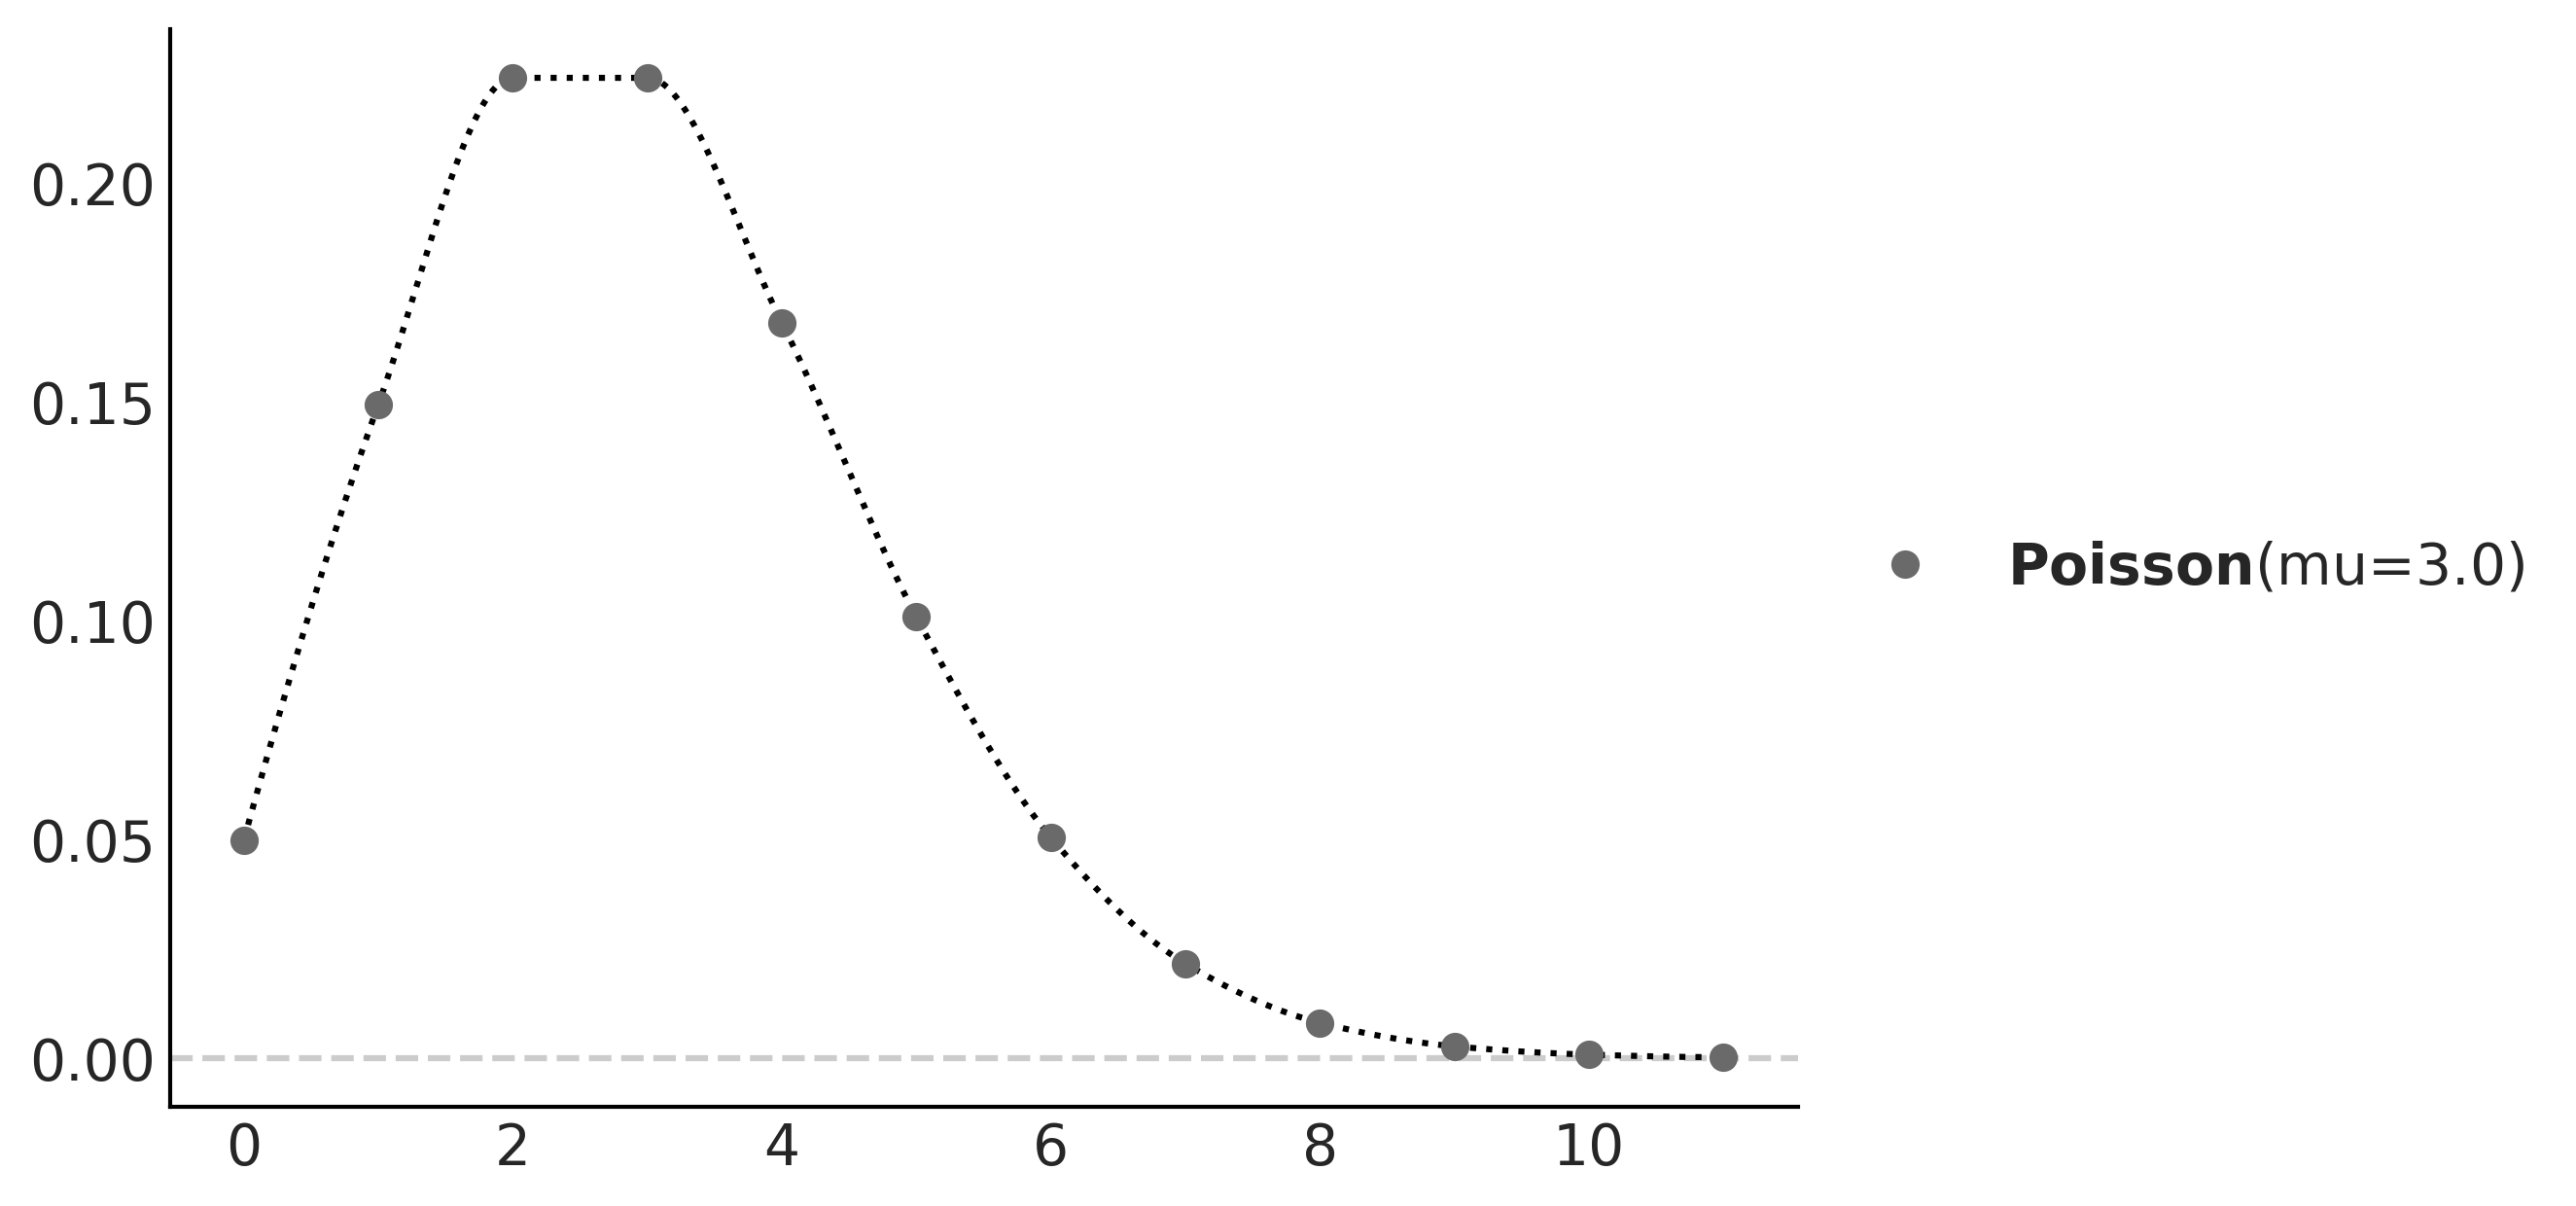

In [ ]:
pz.Poisson(mu=3).plot_pdf();

Notice that for a BetaBinomial(alpha=10, beta=10, n=5) distribution, the probability of values not in {0,1,2,3,4,5}, including values such as -1,0.5,π,8, 42 etc is 0.00 (Demonstrated Below)

In [ ]:
pmfs = pz.BetaBinomial(alpha=10, beta=10, n=5).pdf(range(-4,10))
[(i-4, f"{x:0.3f}") for i, x in enumerate(pmfs)]

[(-4, '0.000'),
 (-3, '0.000'),
 (-2, '0.000'),
 (-1, '0.000'),
 (0, '0.047'),
 (1, '0.168'),
 (2, '0.285'),
 (3, '0.285'),
 (4, '0.168'),
 (5, '0.047'),
 (6, '0.000'),
 (7, '0.000'),
 (8, '0.000'),
 (9, '0.000')]

We previously mentioned that we can **ask** a random variable for values and every time we ask, we will get a different number. We can simulate this with PreliZ, a Python library for prior elicitation. Take the following code snippet for instance:

In [ ]:
for i in range(10):
    print(pz.BetaBinomial(alpha=10, beta=10, n=6).rvs())

4
2
3
3
3
5
5
2
2
4


This wil give us an integer between 0 and 5. Which one? We don't know beforehand! It is random! But one thing is for sure, if we run the simulating line 1000 times and then plot the probability of occurrence of each of the values in 0 to 5, they should match the pmf of BetaBinomial right? Let's find out:

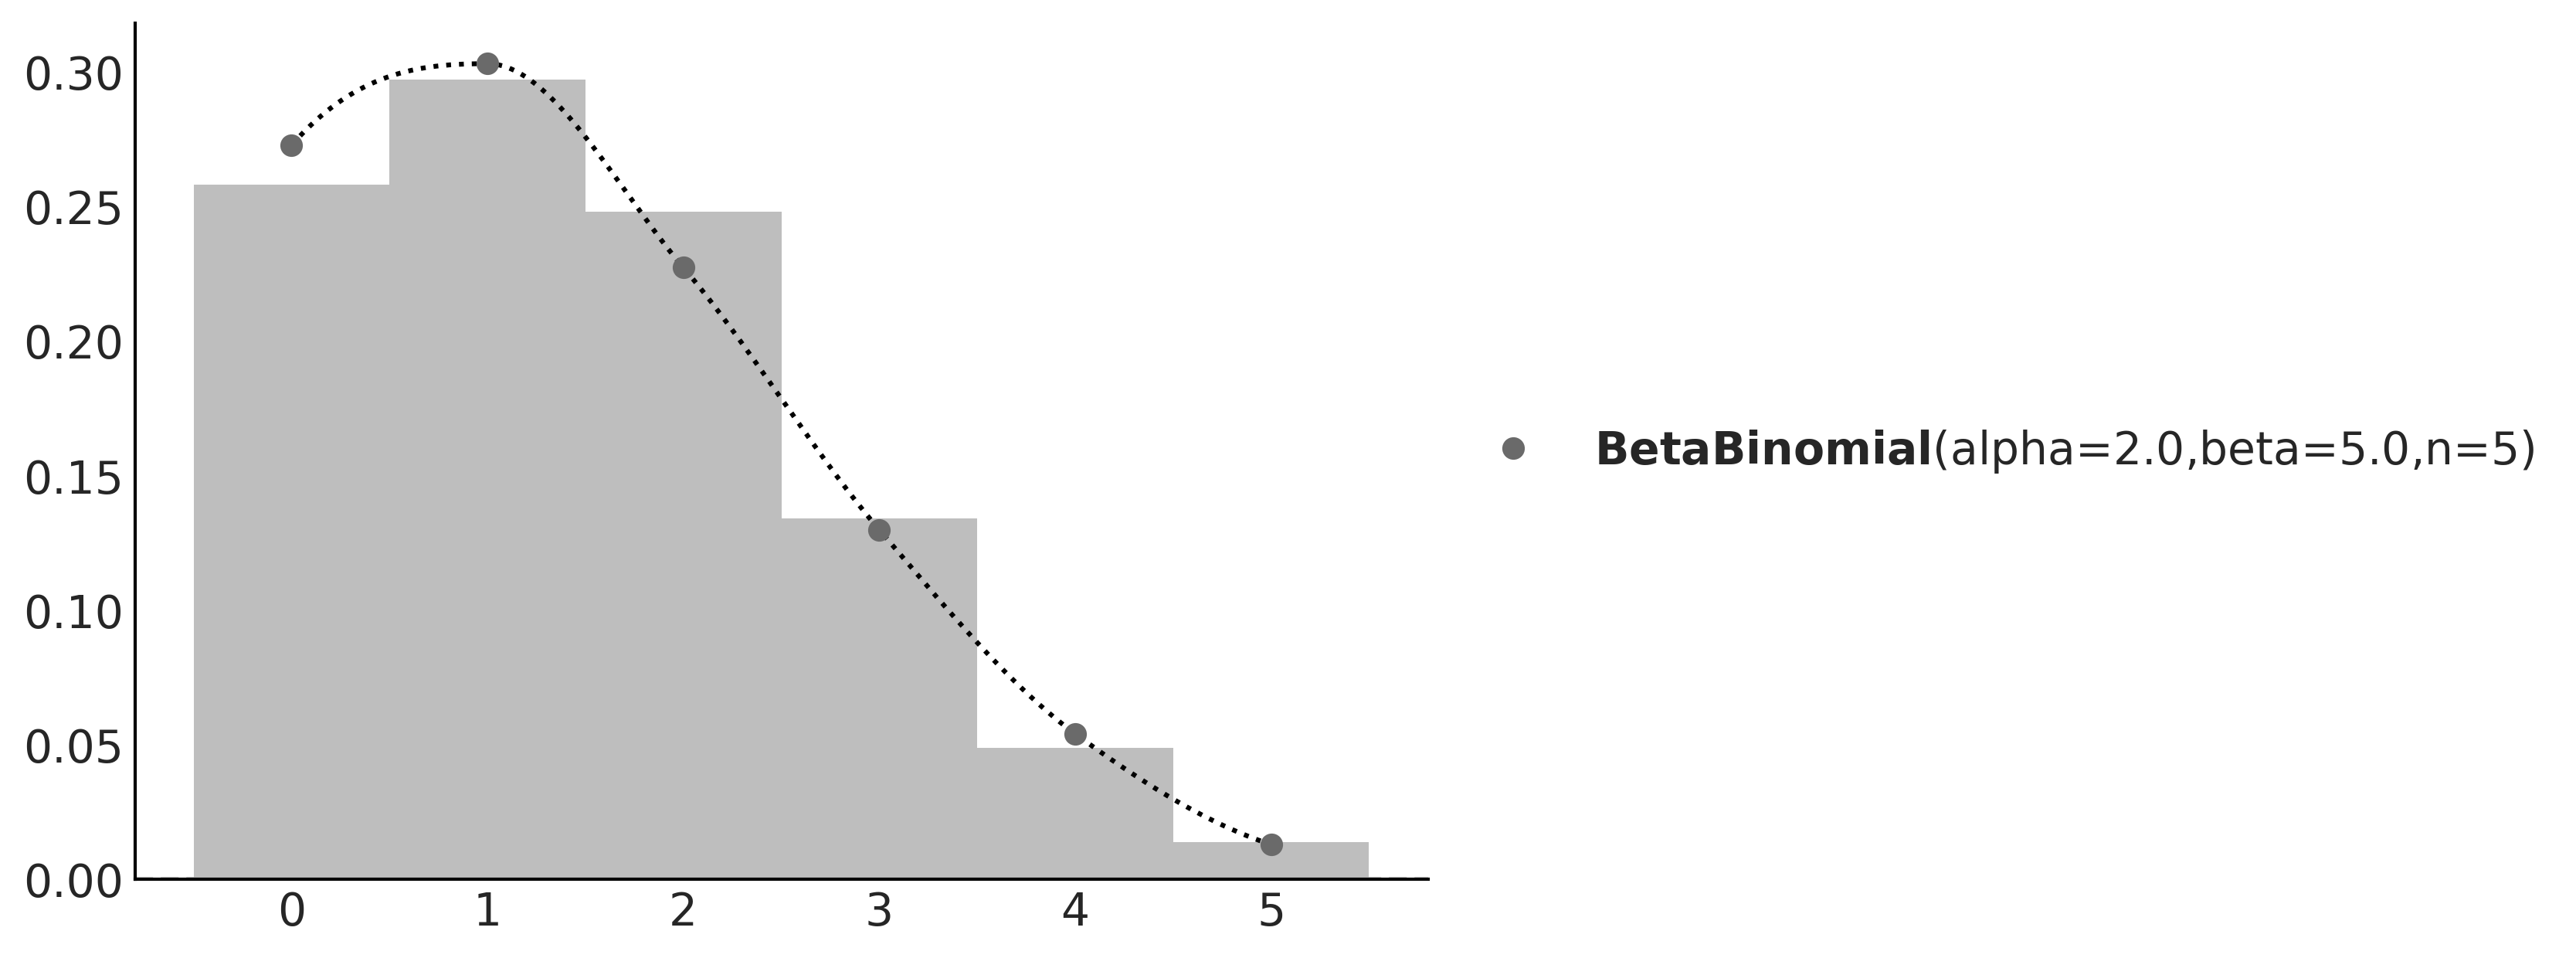

In [ ]:
plt.hist(pz.BetaBinomial(alpha=10, beta=10, n=5).rvs(1000),
         bins=[0, 1, 2, 3, 4, 5, 6], density=True, align="left", color="C2")
pz.BetaBinomial(alpha=2, beta=5, n=5).plot_pdf();
# plt.savefig("../fig/beta_binomial_sampling.png")

Even when we cannot predict the next value from a
 random variable, we can predict the probability of getting any particular value and by the same token, if
 we get many values, we can predict their overall distribution.

 We will sometimes know the parameters of a given distribution and we wil want to get
 random samples from it. Other times, we are going to be in the opposite scenario: we will have a set of
 samples and we wil want to estimate the parameters of a distribution. Playing back and forth between
 these two scenarios will become habitual as we move forward through the pages.

## 1.4.4 Continuous random variables and their distributions
Probably the most widely known continuous probability distribution is the Normal distribution, also known as the Gaussian distribution. Its probability density function is:
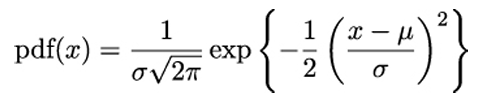

No need to pay too much attention to
 its details, other than to the fact that this distribution has two parameters μ, which controls the location
 of the peak of the curve, and σ, which controls the spread of the curve.

 If you want to learn more about this distribution, I recommend you watch this
 video by 3B1B:
https://www.youtube.com/watch?v=cy8r7WSuT1I.


Let's plot PDFs of 3 members of guassian family:

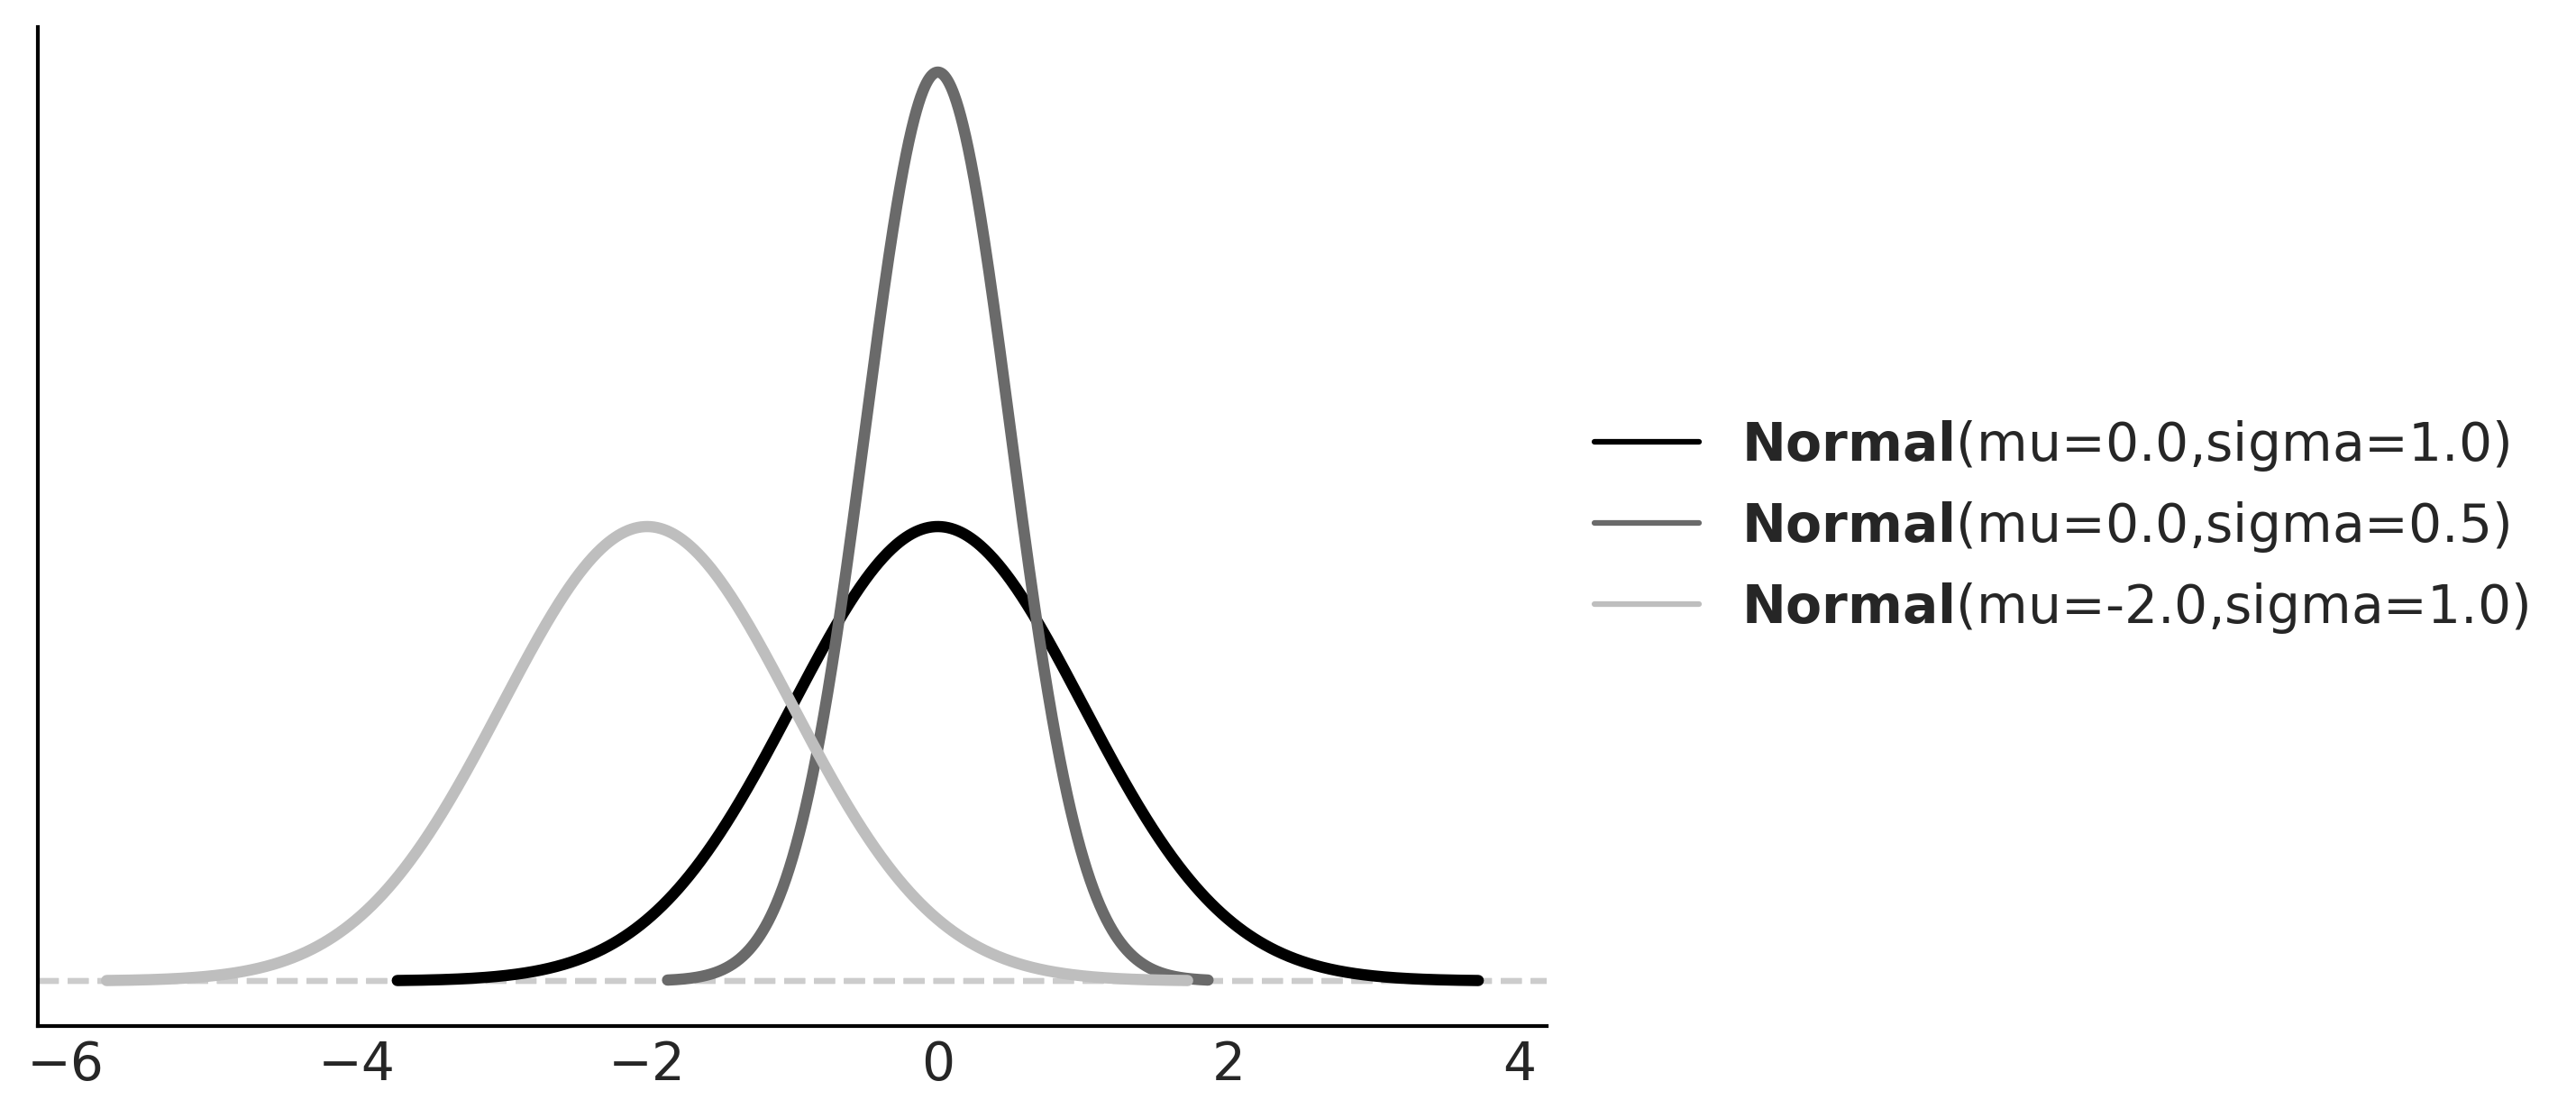

In [ ]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]
# plt.savefig("../fig/gaussian_pdf.png")

 If you have been paying attention, you may have noticed that we said probability density function(pdf). Now, I want you to realise that we have shifted to continuous distributions.  And for a continuous
random variable, we can only assign a probability of 0 to every individual value it may take; instead, we can assign densities to them and then we can calculate probabilities for a range of values.

Thus, for a Gaussian, the probability of getting exactly the number -2, i.e. the number -2 folowed by an infinite number of zeros after the decimal point, is 0. But the probability of getting a number between -2 and 0 is some number larger than 0 and sma ler than 1. To find out the exact answer, we need to compute the following:

$$ P(a<X<b) = \int_{a}^b pdf(x)dx $$

And to compute that, we need to replace the symbols for a concrete quantity. If we replace the pdf by
 Normal(0,1), and a = −2, b = 0, we wil get that P(−2 < X < 0) ≈ 0.477, which is the shaded area in

0.4772498680518208

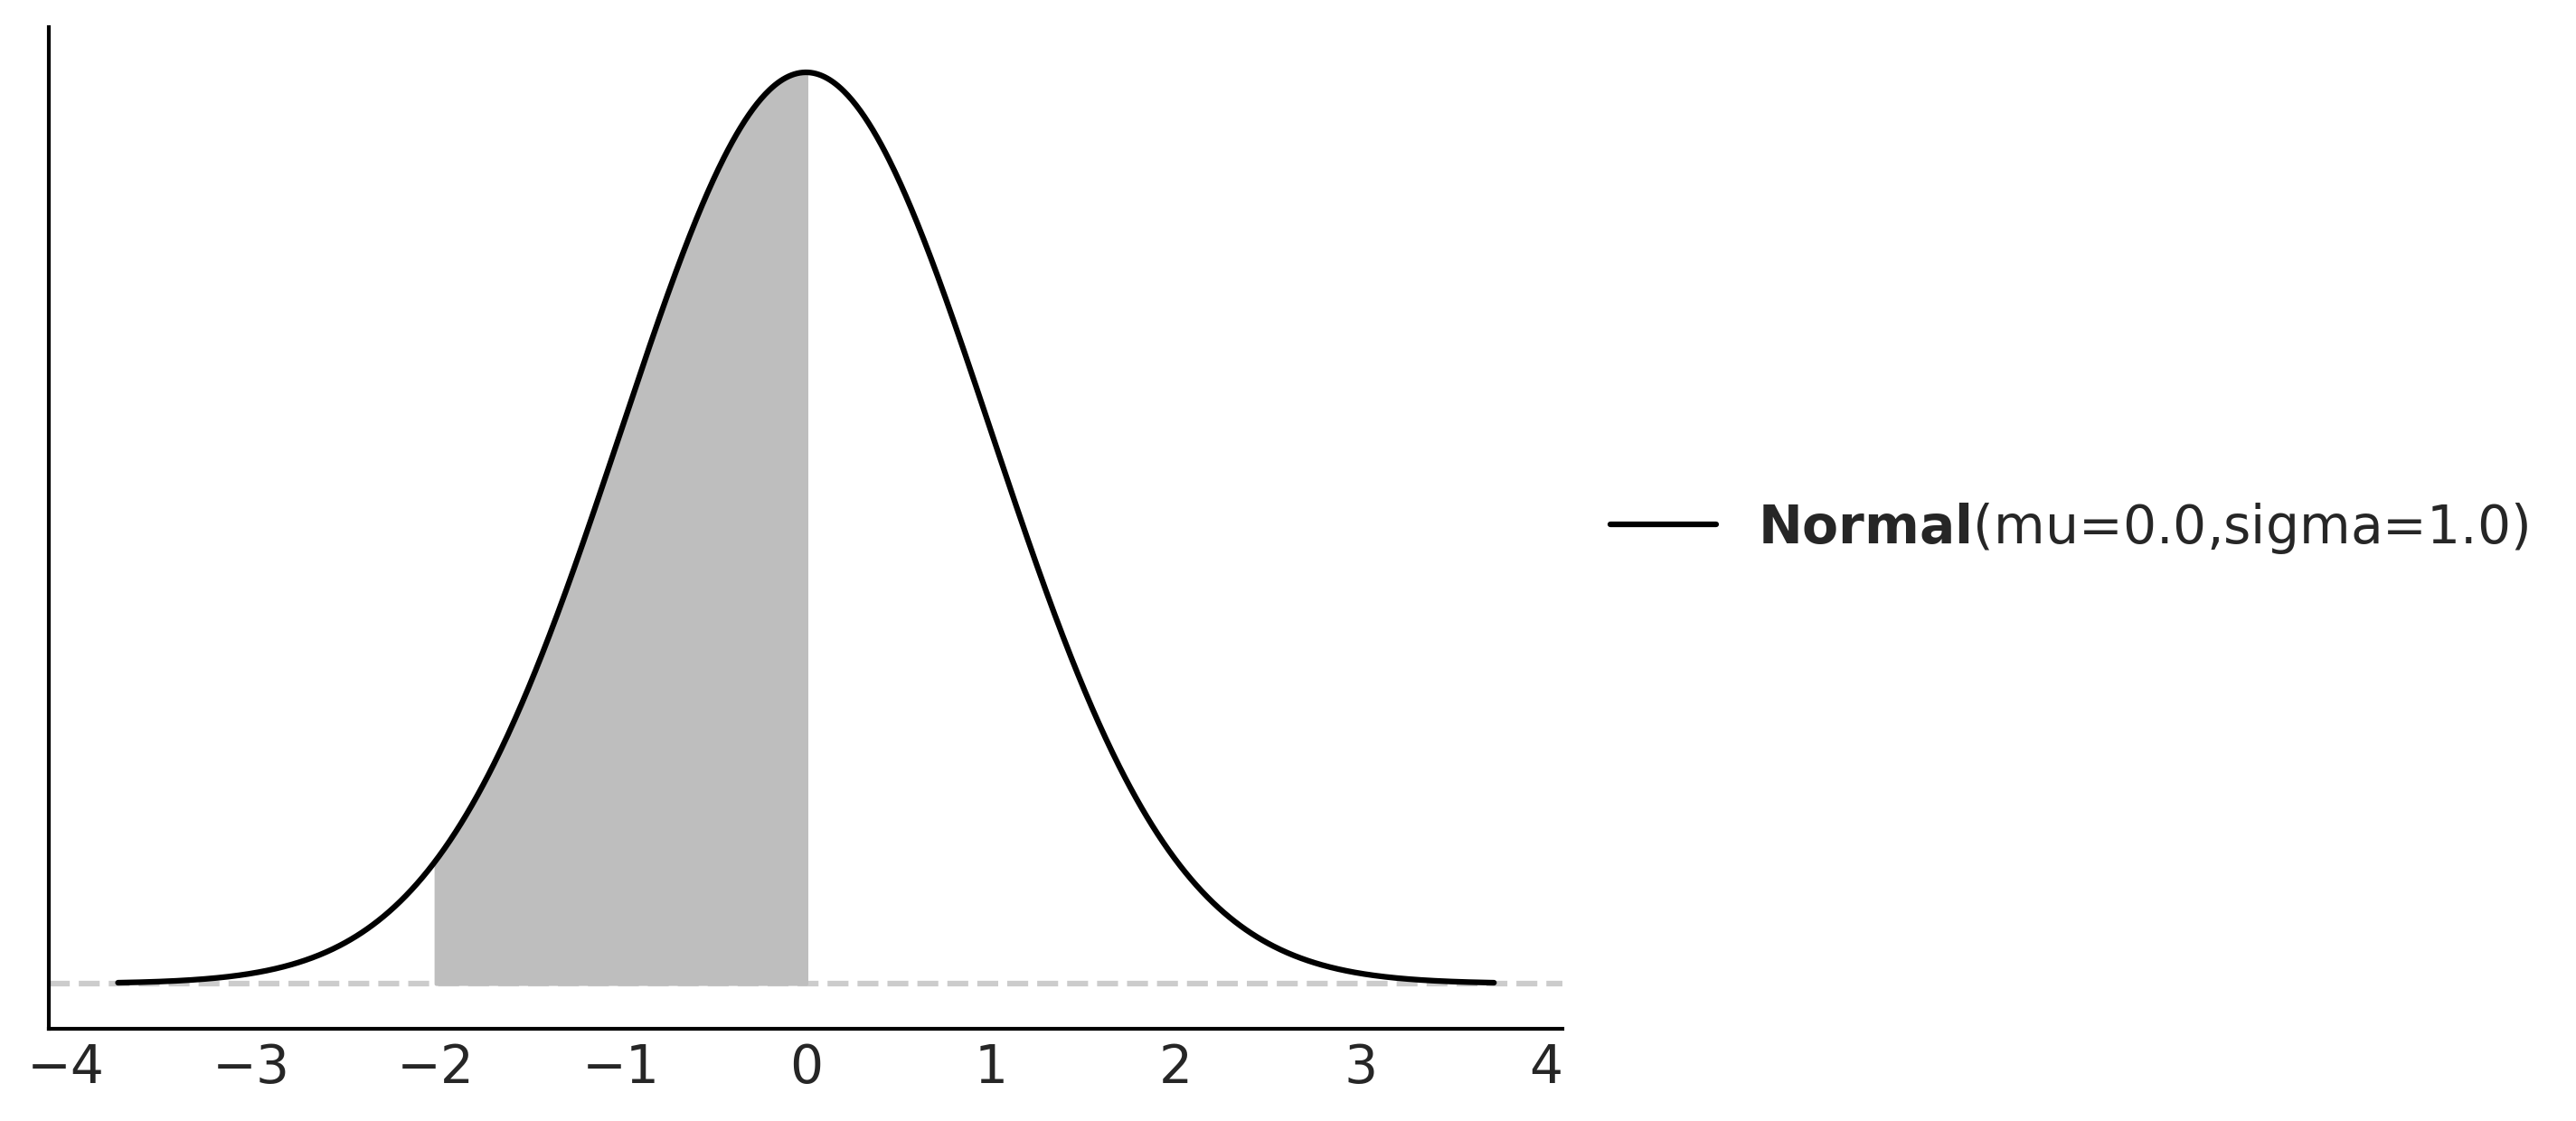

In [ ]:
dist = pz.Normal(0, 1)
ax = dist.plot_pdf()
x_s = np.linspace(-2, 0)
ax.fill_between(x_s, dist.pdf(x_s), color="C2")
# plt.savefig("../fig/gauss_prob.png")
dist.cdf(0) - dist.cdf(-2)

You may remember from JEE times that we can approximate an integral by summing areas of rectangles and the approximation becomes more and more accurate as we reduce the length of the base of the rectangles (Riemann ji ka integral).

 Based on this idea and using PreliZ, we can estimate P(-2 < X < 0) as:

In [ ]:
dist = pz.Normal(0, 1)
a = -2
b = 0

# If we increase the value of num, we wil get a better approximation.
num = 1000

x_s = np.linspace(a, b, num)
base = (b-a)/num
np.sum(dist.pdf(x_s) * base)

0.47722551540067837

These lines calculate the probability density function (PDF) values of the normal distribution at specific points (0 and 0.4):

In [ ]:
dist.pdf(0), dist.pdf(0.4)

(0.3989422804014327, 0.36827014030332333)

These lines calculate the proportion of random samples that fall within the ranges (-inf, 0) and (0.3, 0.5) respectively:

In [ ]:
values = dist.rvs(1000000)
np.mean([(0  > values)]), np.mean([(0.3  > values)  & (values < 0.5)])

(0.499625, 0.617611)

And we know that half of the values lie below 0 in Standard Normal Distribution i.e.
```
 P(X<0) ~ 0.499625
```

## 1.4.5 Cumulative distribution function

We have seen the pmf and the pdf, but these are not the only ways to characterize distributions. An
 alternative is the cumulative distribution function (cdf). The cdf of a random variable X is the
 function F given by F (x) = P(X ≤ x). In words, the cdf is the answer to the question: what is the
 probability of getting a number lower than or equal to x?

 On the first column of below figure, we can see
 the pmf and cdf of a BetaBinomial, and in the second column, the pdf and cdf of a Gaussian. Notice how the cdf jumps for the discrete variable but it is smooth for the continuous variable.

 The height of
 each jump represents a probability - just compare them with the height of the dots. We can use the plot
 of the cdf of a continuous variable as visual proof that probabilities are zero for any value of the
 continuous variable.

 Just notice how there are no jumps for continuous variables, which is equivalent to
 saying that the height of the jumps is exactly zero

<Axes: >

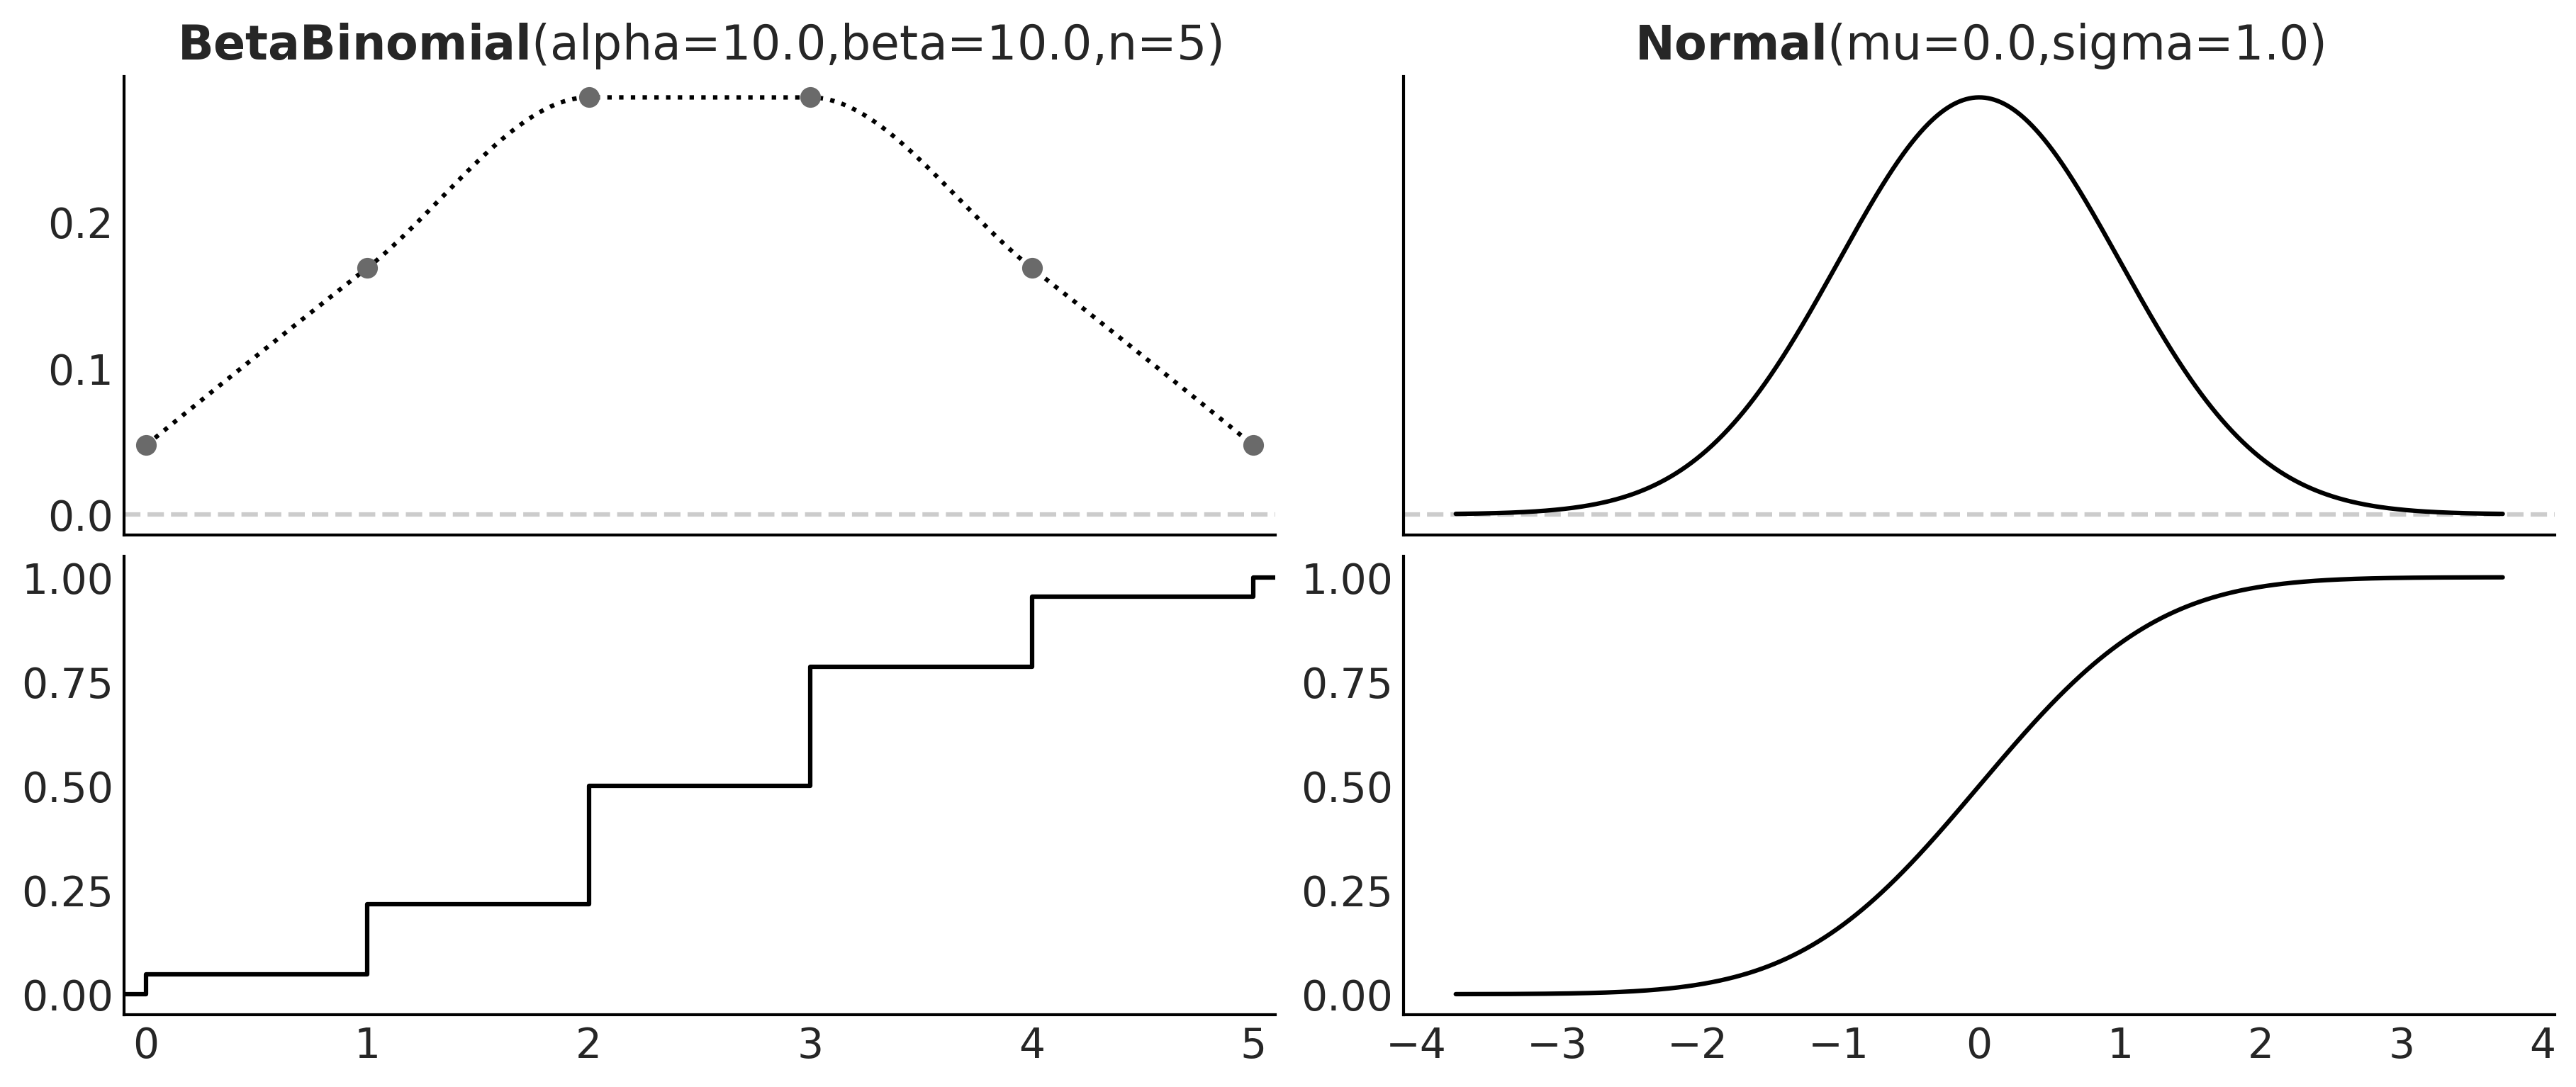

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(12, 5), sharex="col")

# BETA-BINOMIAL (DISCRETE):
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_pdf(ax=ax[0, 0], legend="title")
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_cdf(ax=ax[1, 0], legend=None)

# NORMAL DIST. (CONTINUOUS):
pz.Normal(0, 1).plot_pdf(ax=ax[0, 1], legend="title")
pz.Normal(0, 1).plot_cdf(ax=ax[1, 1], legend=None)
# plt.savefig("../fig/cdf_pdf.png", bbox_inches='tight')

 Just by looking at a cdf, it is easier to find what is the probability of getting a number smaller than, let's
 say, 1. We just need to go to the value 1 on the x-axis, move up until we cross the black line, and then
 check the value of the y-axis. For instance, for the Normal distribution, we can see
 that the value lies between 0.75 and 1. Let's say it is ≈ 0.85. This is way harder to do with the pdf
 because we would need to compare the entire area below 1 to the total area to get the answer.

## 1.4.6 Conditional probability
 Given two events A and B with P(B) > 0, the probability of A given B, which we write as P(A|B) is defined as:
```
P(A|B) = P(A,B) / P(B)
```
P(A,B) is the probability that both the event A and event B occur. P(A|B) is known as conditional
 probability, and it is the probability that event A occurs, conditioned by the fact that we know (or
 assume, imagine, hypothesize, etc.) that B has occurred.

  A conditional probability can be larger than, smaller than, or equal to the unconditional probability. If
 knowing B does not provide us with information about A, then P(A|B) = P(A). This wil be true only if A
 and B are independent of each other. On the contrary, if knowing B gives us useful information about A,
 then the conditional probability could be larger or smaller than the unconditional probability, depending on
 whether knowing B makes A less or more likely.

Let’s see a simple example using a fair six-sided die.
 What is the probability of getting the number 3 if we rol the die? P(die = 3) = 1/6 since each of the six
 numbers has the same chance for a fair six-sided die.

 And what is the probability of getting the number
 3 given that we have obtained an odd number? P(die = 3 | die = {1,3,5}) = 1/3, because if we know we
 have an odd number, the only possible numbers are {1,3,5} and each of them has the same chance.

 Finally, what is the probability of getting 3 if we have obtained an even number? This is P(die = 3 | die =
 {2,4,6}) = 0, because if we know the number is even, then the only possible ones are {2,4,6} and thus
 getting a 3 is not possible.

 As we can see from these simple examples, by conditioning on observed data, we are changing the
 sample space. When asking about P(die = 3), we need to evaluate the sample space S = {1,2,3,4,5,6},
 but when we condition on having got an even number, then the new sample space becomes T =
 {2,4,6}.

Text(1, -2, ' ... $p(A \\mid B)$')

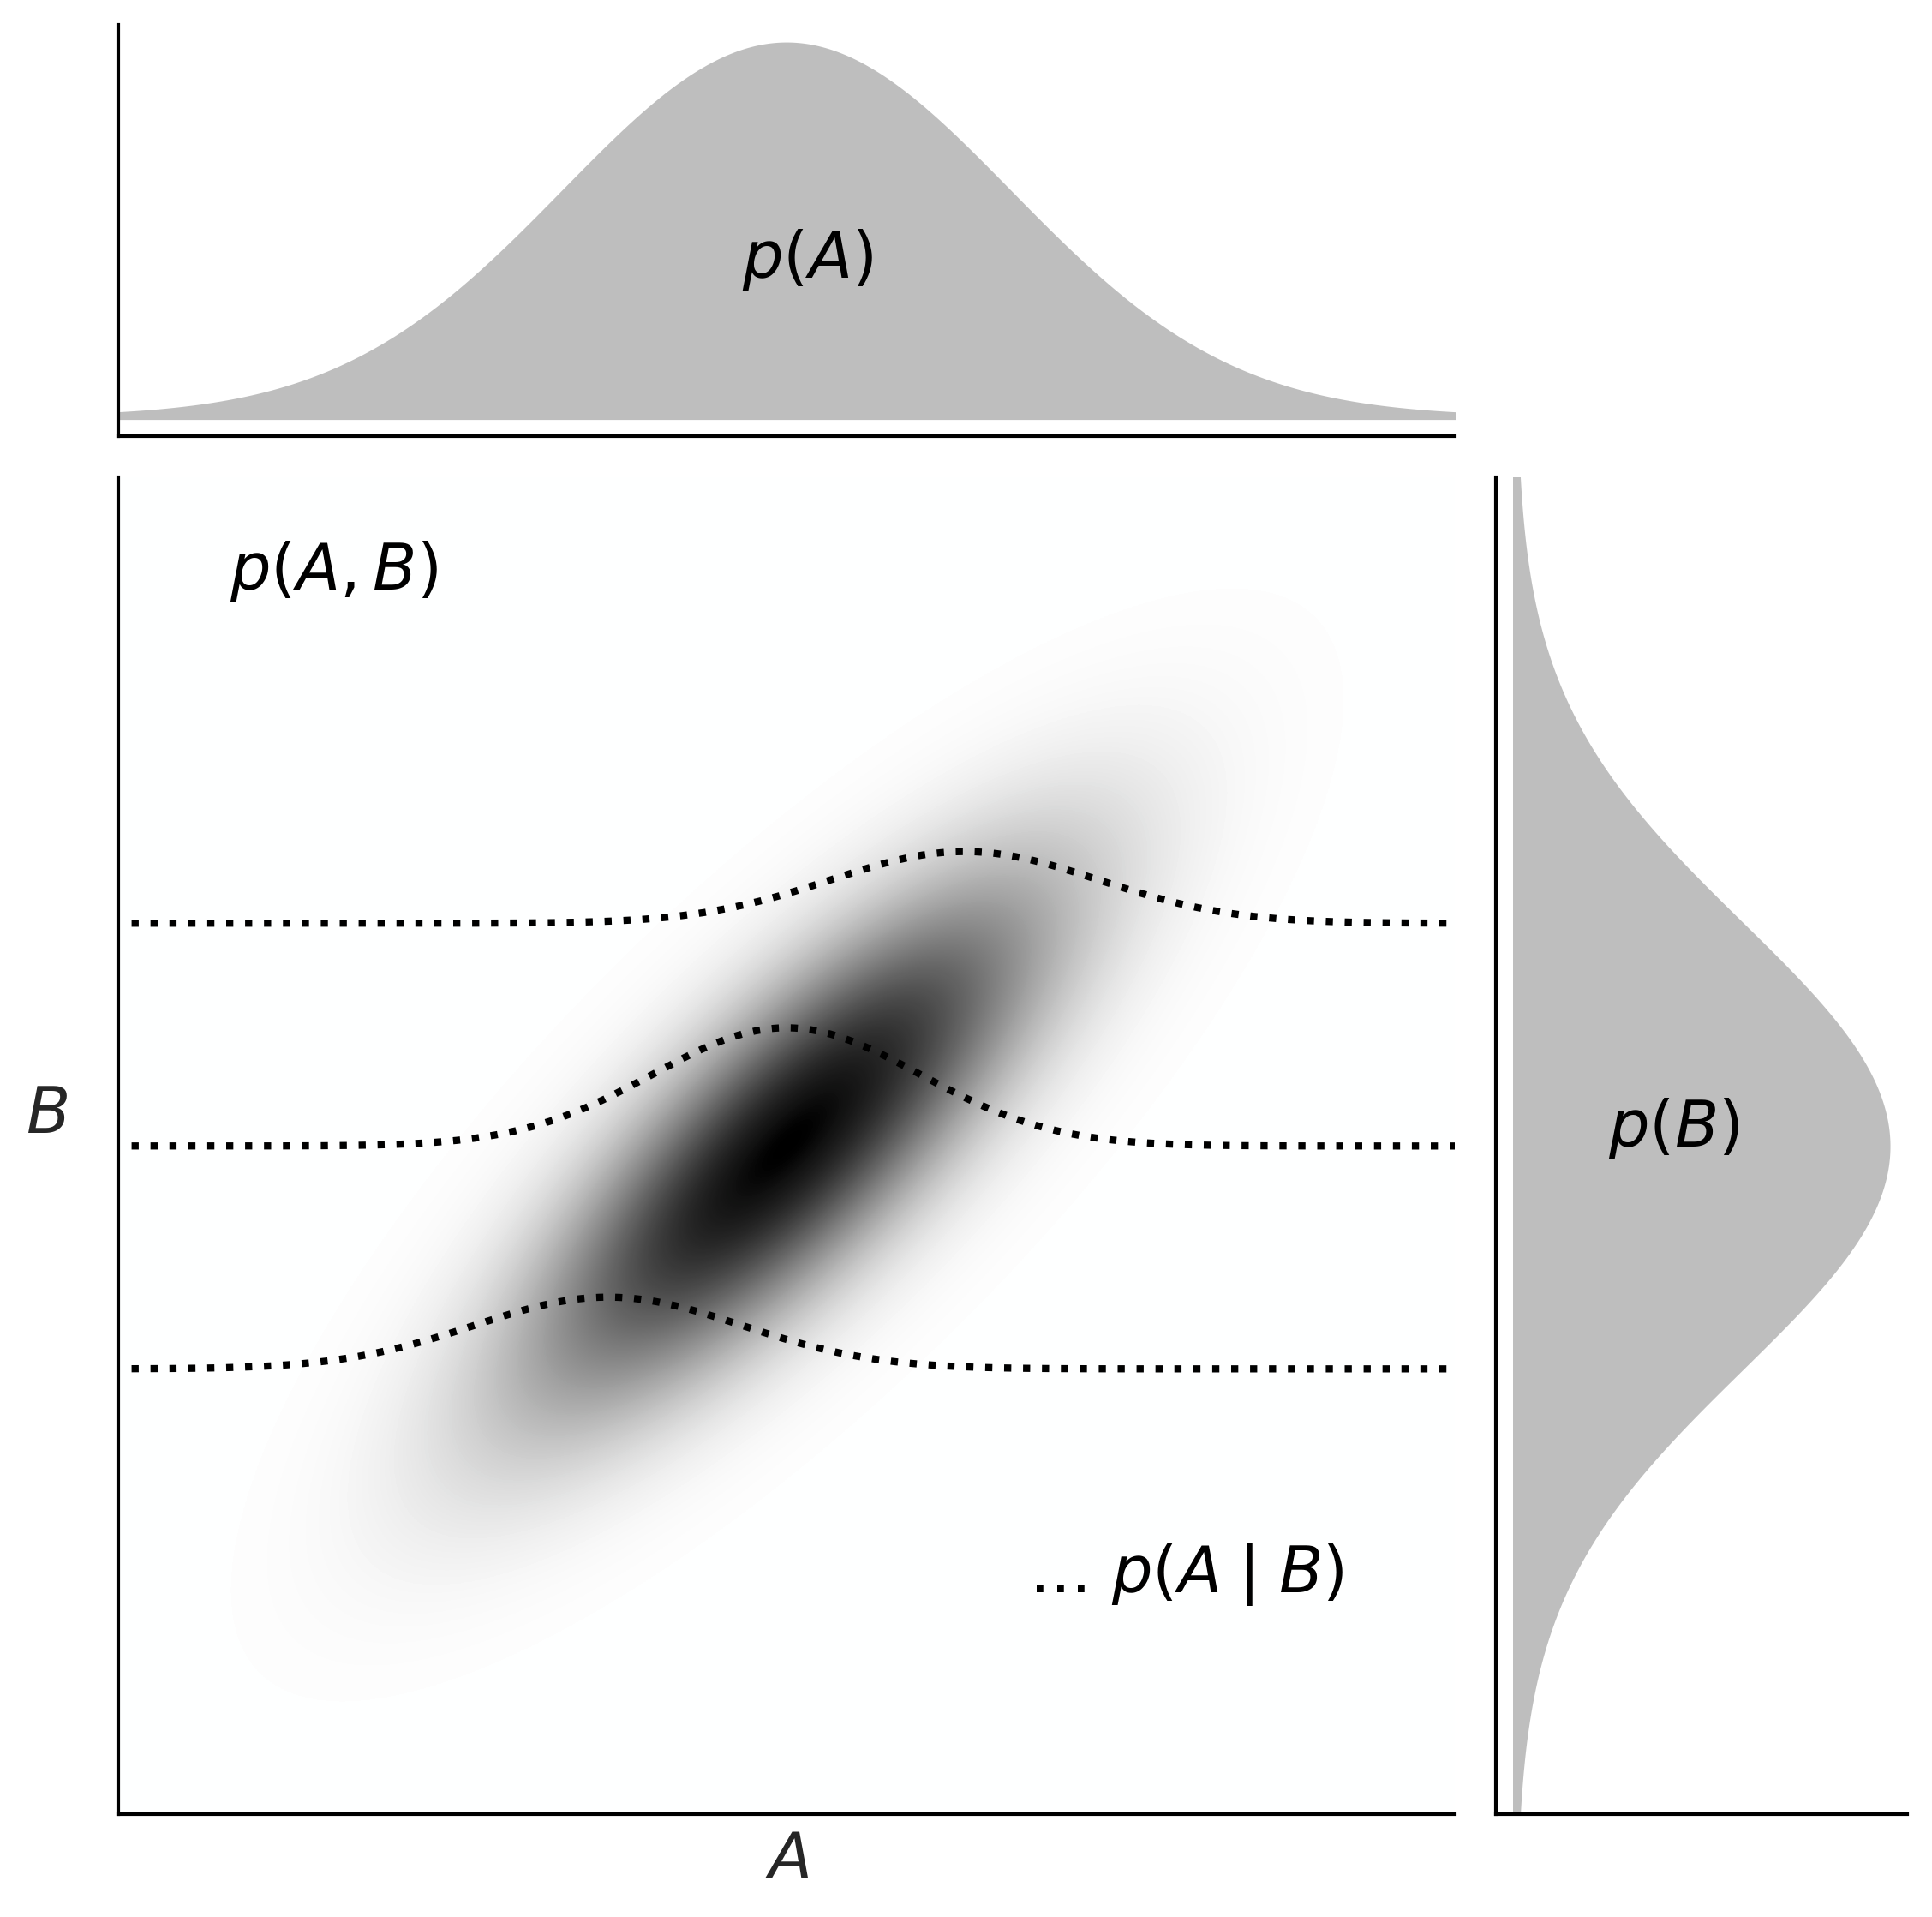

In [ ]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = pz.MvNormal([0, 0], [[1, 0.8],
                          [0.8, 1]])

x_value = pos[:, :, 0][:,0]
x_density = rv.pdf(pos)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


_, axes_arr = plt.subplots(1, 3, figsize=(8, 8))

ax_joint, ax_x, ax_y = axes_arr
ax_joint.set_position(rect_scatter)
ax_x.set_position(rect_histx)
ax_y.set_position(rect_histy)

ax_joint.imshow(x_density, cmap='cet_gray_r', origin='lower', extent=[-3, 3, -3, 3])

ax_joint.plot(x_value, x_density[400]*2, 'k:', lw=2)
ax_joint.plot(x_value, x_density[500]*2+1, 'k:', lw=2)
ax_joint.plot(x_value, x_density[300]*2-1, 'k:', lw=2)

ax_x.fill_between(x_value, x_density.sum(1), color='C2')
ax_y.fill_betweenx(x_value, x_density.sum(1), color='C2')


for ax in [ax_joint, ax_x, ax_y]:
    ax.grid(False)
    ax.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])
ax_joint.set_xlim(-3, 3)
ax_joint.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_y.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_joint.set_ylabel('$B$', rotation=0, labelpad=20, fontsize=18)
ax_joint.set_xlabel('$A$', fontsize=18)

ax_joint.text(-2.5, 2.5, '$p(A, B)$', fontsize=18, color='k', weight='medium')
ax_y.text(10, 0, '$p(B)$', fontsize=18, color='k', weight='medium')
ax_x.text(-0.2, 15, '$p(A)$', fontsize=18, color='k', weight='medium')
ax_joint.text(1, -2, ' ... $p(A \mid B)$', fontsize=18, color='k', weight='medium')
# plt.savefig('../fig/joint_marginal_cond.png')

 The central panel of above represents p(A,B) using a grayscale with darker colors for higher probability densities. We see the joint distribution is elongated, indicating that the higher the value of A,
 the higher the one of B, and vice versa.  Knowing the value of A tells us something about the values of B
 and the other way around.

 On the top and right margins of Figure, we have the marginal
 distributions p(A) and p(B) respectively. To compute the marginal of A, we take p(A,B) and we
 average overall values of B, intuitively this is like taking a 2D object, the joint distribution, and projecting
 it into one dimension. The marginal distribution of B is computed similarly.

 The dashed lines represent
 the conditional probability p(A|B) for 3 different values of B. We get them by slicing the joint p(A,B)
 at a given value of B. We can think of this as the distribution of A given that we have observed a
 particular value of B.

## 1.4.7 Expected values

 If X is a discrete random variable, we can compute its expected value as:
 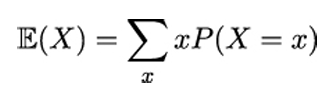

 This is just the mean or average value.

You are probably used to computing means or averages of samples or colections of numbers, either by
 hand, on a calculator, or using Python. But notice that here we are not talking about the mean of a
bunch of numbers; we are talking about the mean of a distribution. Once we have defined the
 parameters of a distribution, we can, in principle, compute its expected values. Those are properties of
 the distribution in the same way that the perimeter is a property of a circle that gets defined once we set
 the value of the radius.

 Another expected value is the variance, which we can use to describe the spread of a distribution. The
 variance appears naturally in many computations in statistics, but in practice, it is often more useful to
 use the standard deviation, which is the square root of the variance. The reason is that the standard
 deviation is in the same units as the random variable.


The mean and variance are often called the moments of a distribution. Other moments are skewness, which tells us about the asymmetry of a distribution, and the kurtosis, which tells us about the behavior of the tails or the extreme values.

Below we show example of some distributions and their mean μ, standard deviation σ, skew γ, and kurtosis:

<Axes: title={'center': '$\\bf{StudentT}$(nu=3.0,mu=0.0,sigma=1.0)\nμ=0, σ=1.73, γ=nan, κ=inf'}>

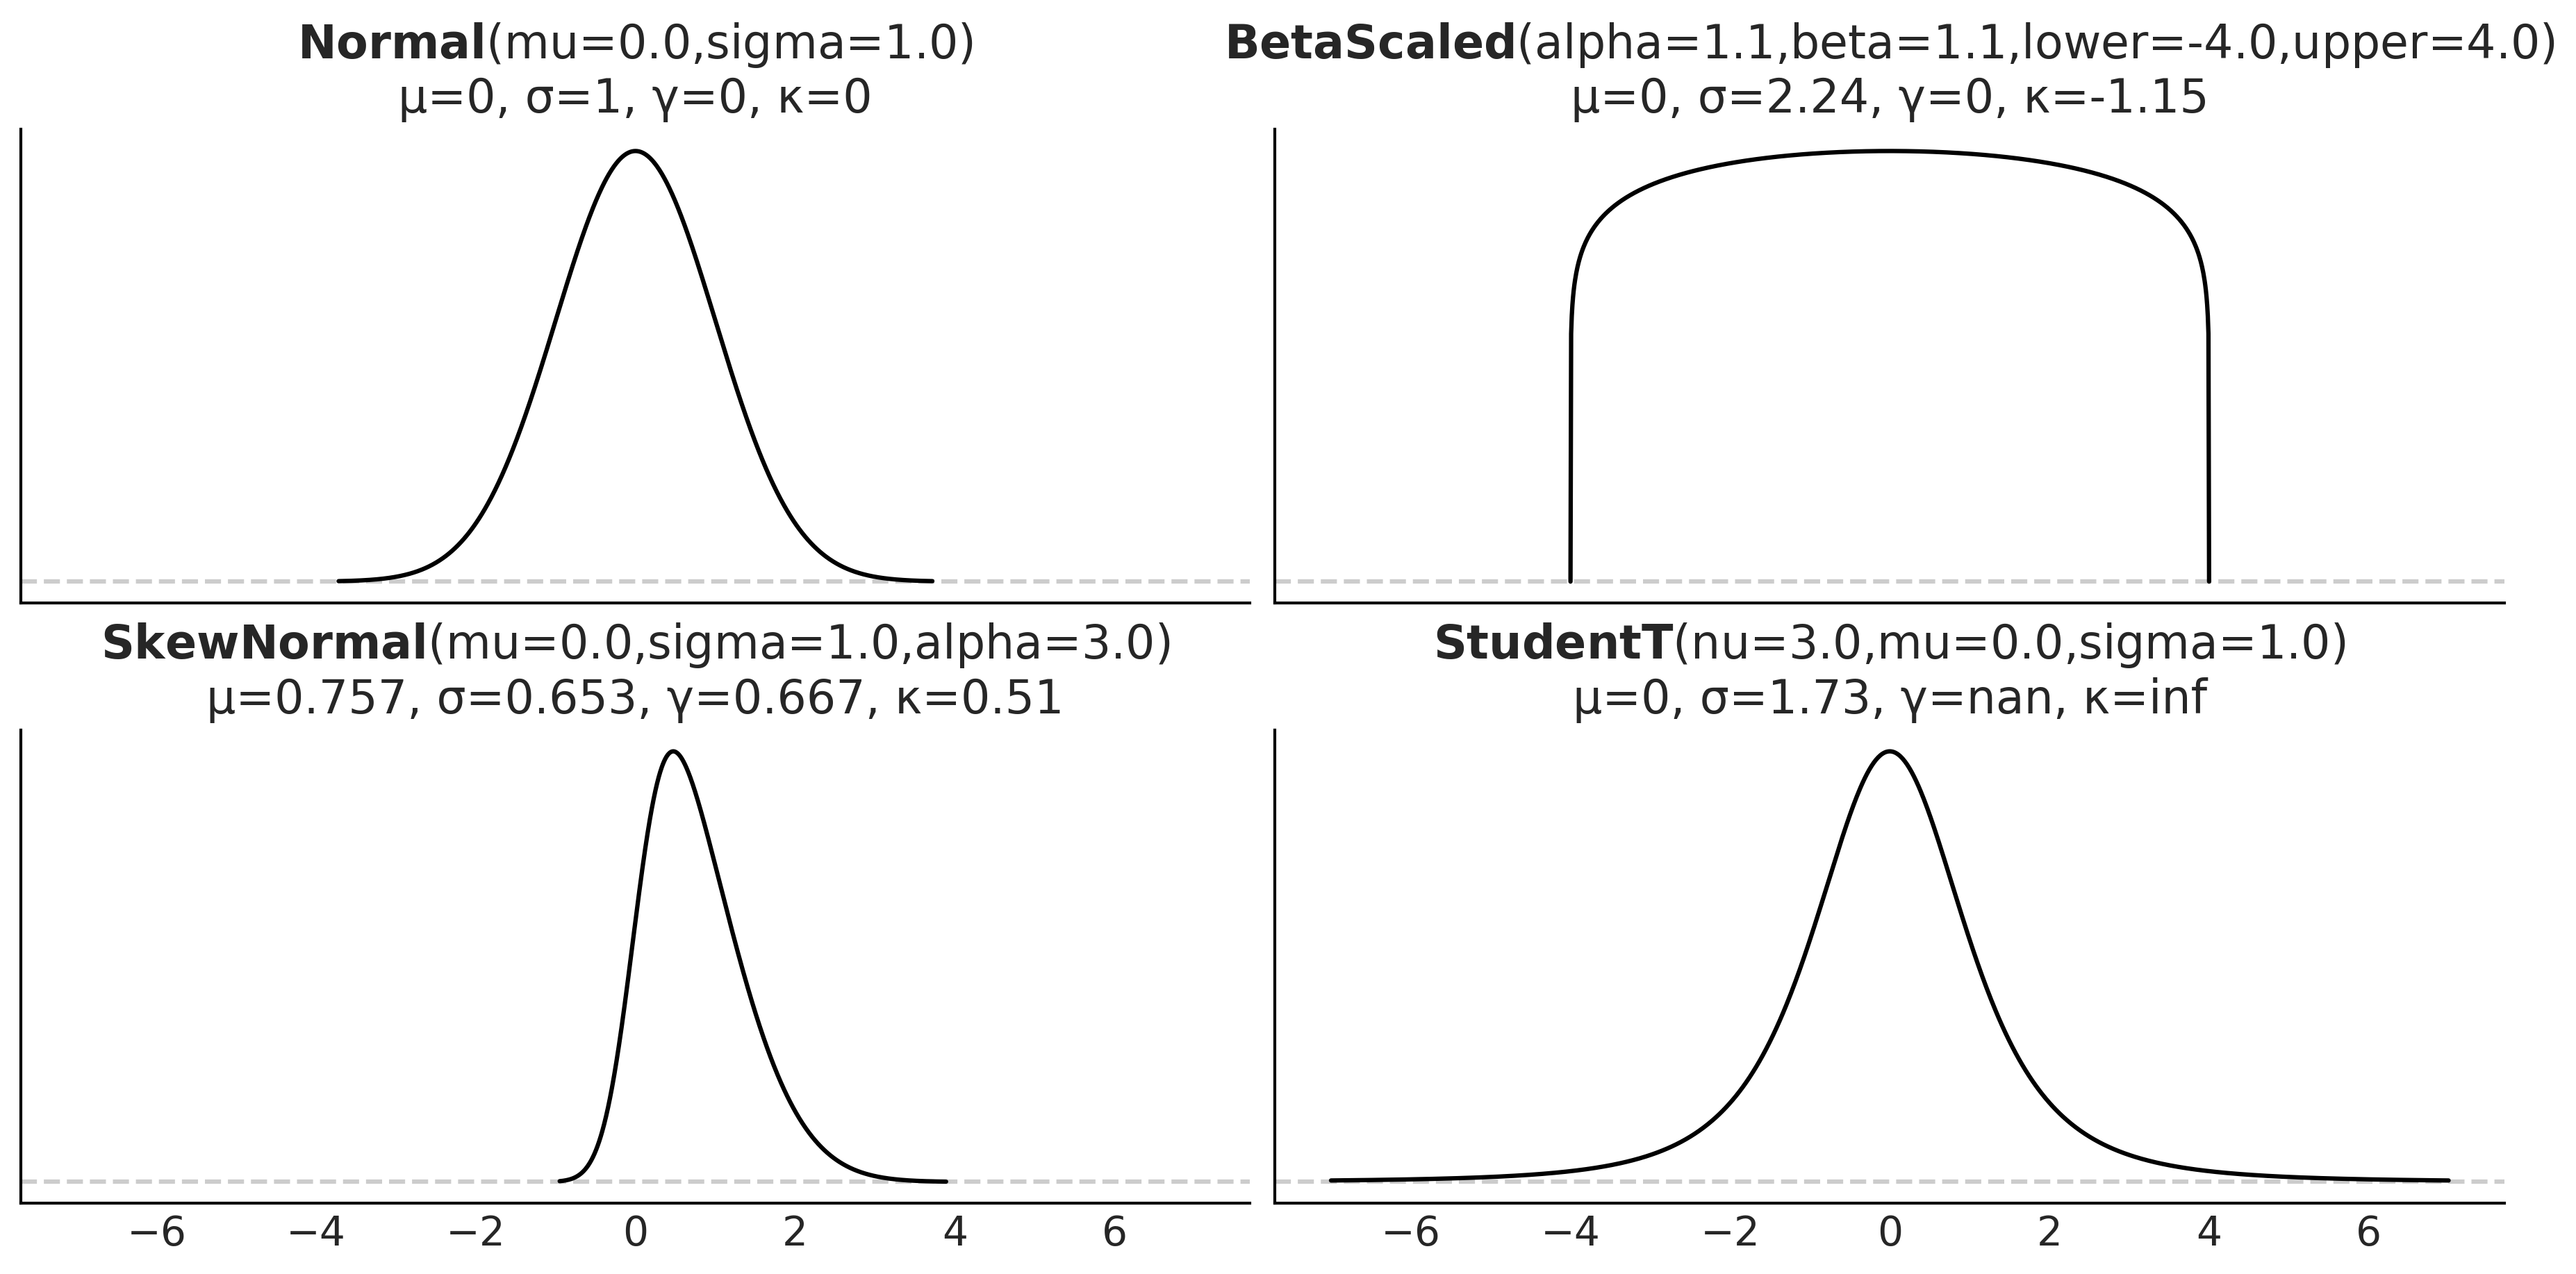

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 0], moments=["m", "d", "s", "k"], legend="title")
pz.BetaScaled(1.1, 1.1, -4, 4).plot_pdf(ax=ax[0, 1], moments=["m", "d", "s", "k"], legend="title")
pz.SkewNormal(0, 1, 3).plot_pdf(ax=ax[1, 0], moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(ax=ax[1, 1], moments=["m", "d", "s", "k"], legend="title", support=(-7, 7))

<Axes: >

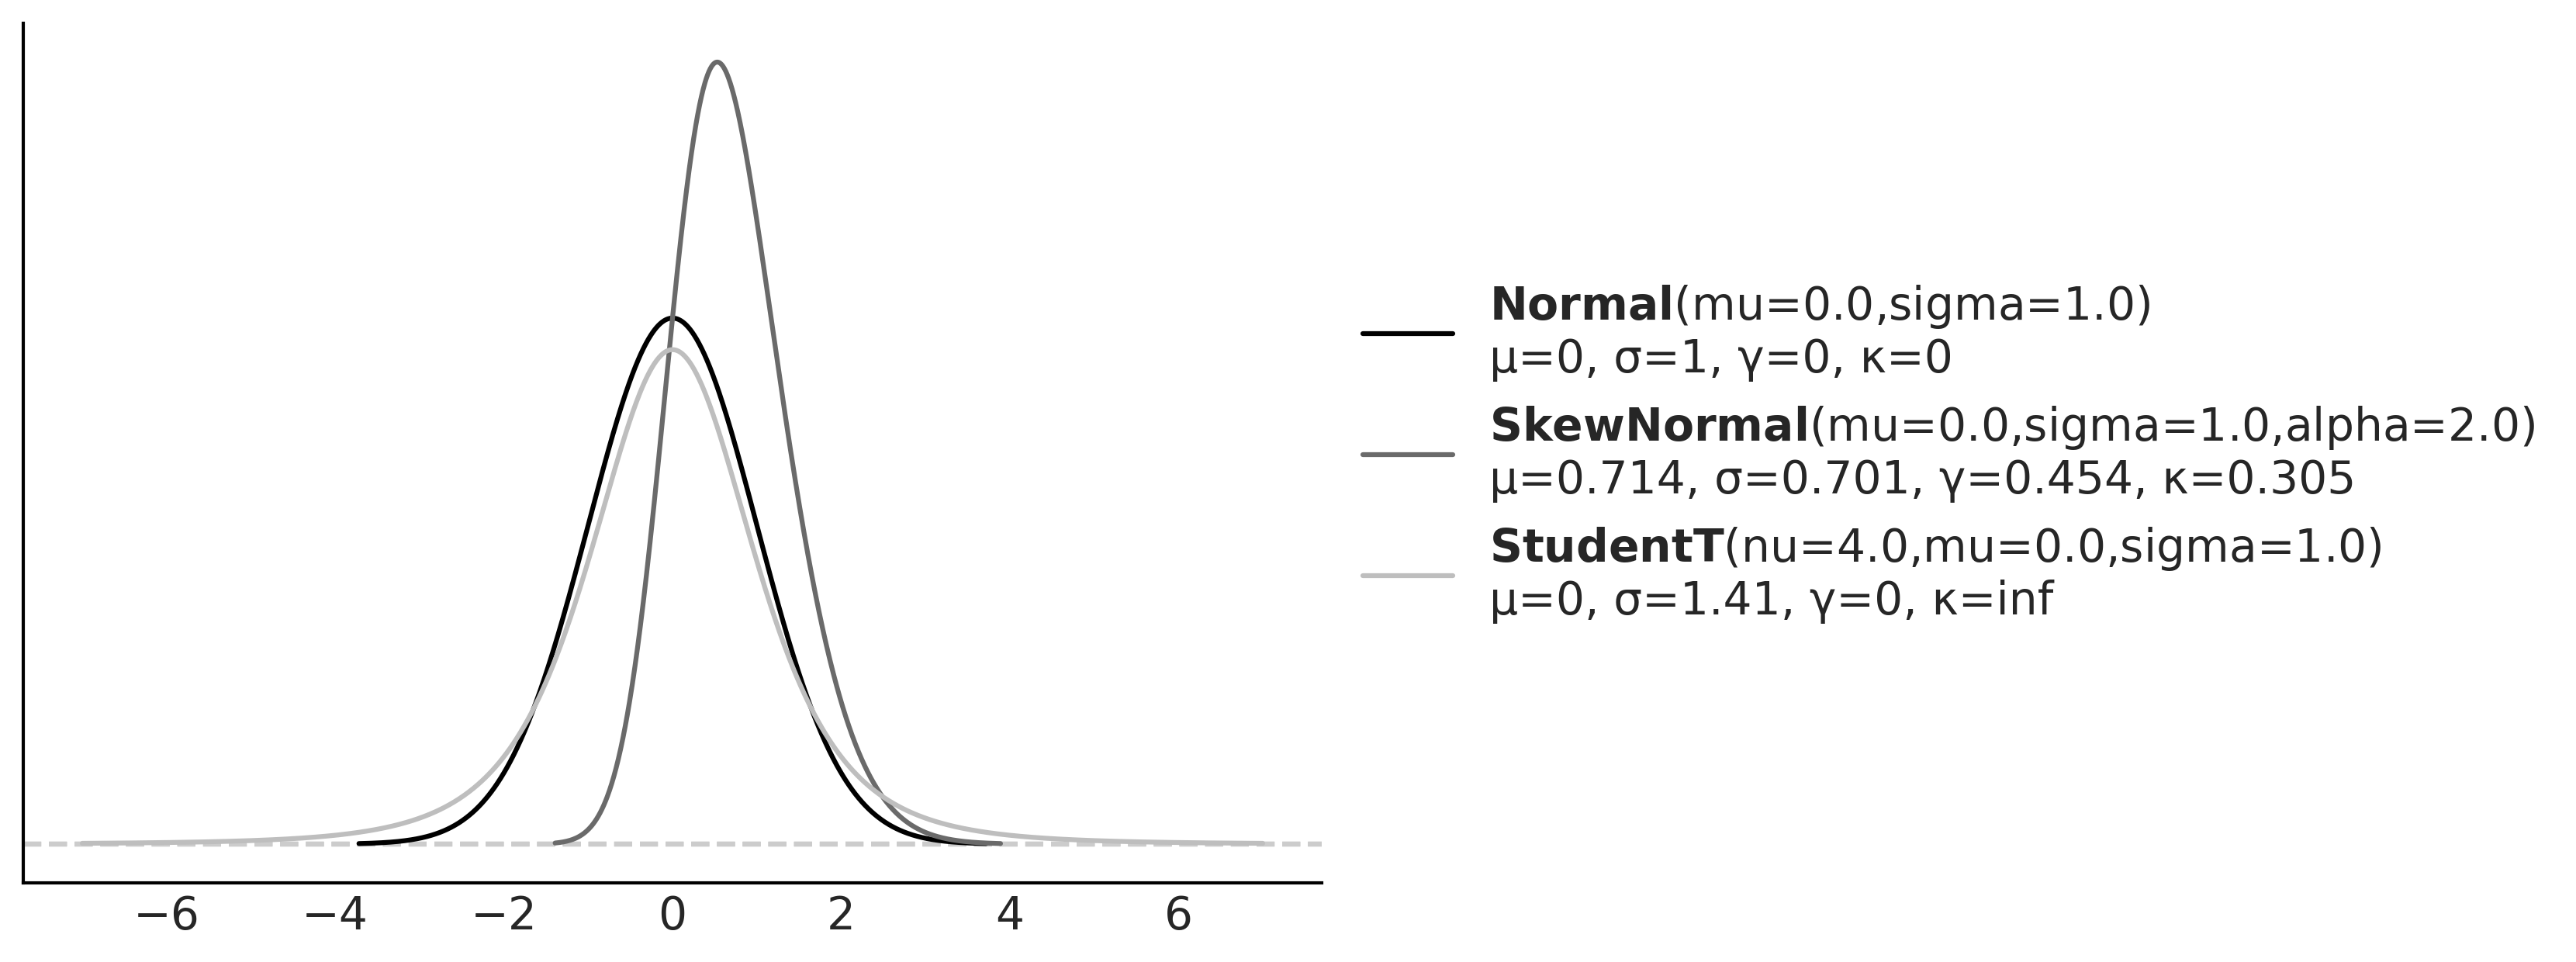

In [ ]:
pz.Normal(0, 1).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])
pz.StudentT(4, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], support=(-7, 7))

That's it for the first week. Before we end, here's a basic exercise for you (Assignment 1):
https://colab.research.google.com/drive/1dvfQKrKA9lmlWaWuqdhnffl2wxxghYoG?usp=sharing  